
Total number of glucose readings for this patient is: 7633

Some recordings inbetween may be missing, the above number represents the collected readings from start date to end date.

Remove NaN from the mg/dL column...

Total actual number of glucose readings is: 6092

-------------------------------------------

Number of meals recorded is: 253

Some of the successive meal readings stand for one meal with many servings.

Add succesive meal readings (CHO, fat, protein), 30 minute window, and store under one recording...

There is a total of 91 recorded meals.

A sample (head) of meal dataframe...

                 Date  mg/dL  CHO (g)  Fat (g)  Protein (g)
0 2008-07-01 09:43:00   82.0    55.00     0.00        14.00
1 2008-07-01 12:43:00   54.0    58.00    11.00        13.50
2 2008-07-01 14:58:00   86.0     7.00     0.00         5.00
3 2008-07-01 17:58:00   88.0    47.33    18.02        16.62
4 2008-07-02 08:58:00   99.0    55.00     0.00        14.00


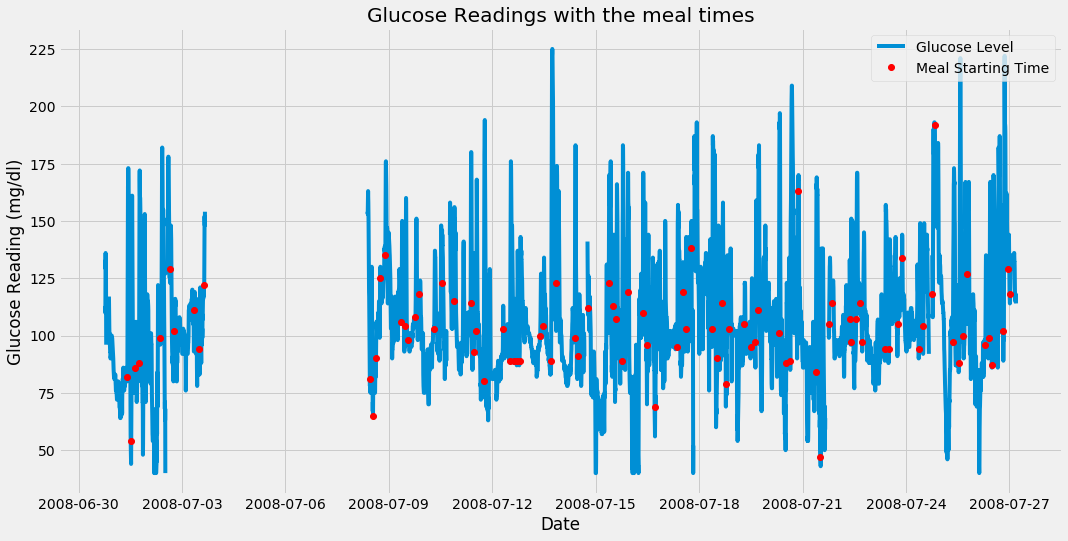

/Users/schem001/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/schem001/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


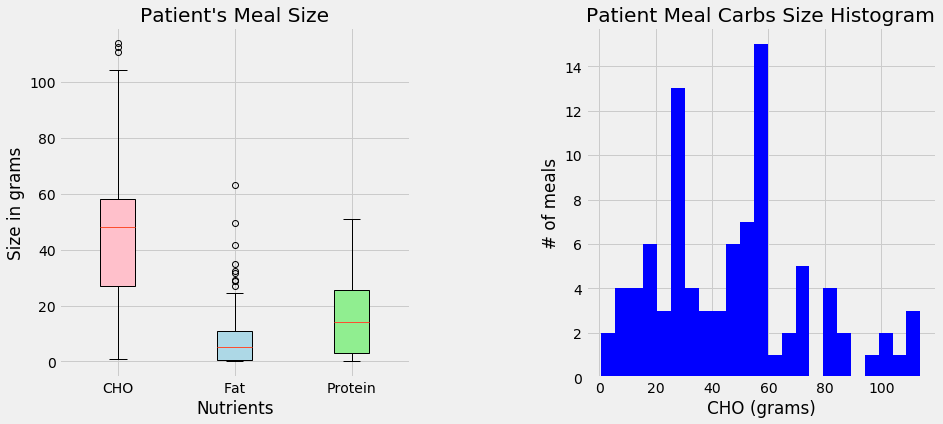

For this patient, the meal Carbs mean is: 47.12 grams with a std of: 26.74 grams.

Data Cleaning...


-------------Condition 1-------------------

Remove meal points which have several missing BG readings in their postprandial window...


The meal at 2008-07-03 15:28:00 has 17 missing readings within its following 120 minutes. Thus, it will be removed.

The meal at 2008-07-17 18:38:00 has 7 missing readings within its following 120 minutes. Thus, it will be removed.

There are 89 remaining meal times recordings.


-------------Condition 2-------------------

Remove meal points which do NOT have a significant BG increase, at least 15 mg/dl, in their postprandial window...


There are 6 meal recordings that will be deleted after this condition.

There are 83 remaining meal times recordings.



/Users/schem001/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/schem001/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)



-------------Condition 3-------------------

Remove meal points which do NOT have a significant BG decrease, at least 15 mg/dl, following their postprandial peak...

Could not detect a significant glucose drop after the following meal recordings:

0   2008-07-08 14:43:00
1   2008-07-23 18:38:00
2   2008-07-27 01:03:00
Name: Date, dtype: datetime64[ns]

There are 80 total remaining readings.
80

For meal recordings that are close and end up having the same peak, remove the latest and keep the first. However, add the meal sizes together.


There are  80 meals remaining.

-------------Condition 4-------------------

Remove meal which have less than 30grams of Carbs...

There are 10 that contain less than 20g of Carbs.

There are  70 meals remaining.

Also, remove meals which have a peak 2 hours after meal time, it must be of some other non-recorded meal...

2 meals of such will be removed.

There are  68 meals remaining.


/Users/schem001/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/schem001/anaconda/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)



---------------------------------------

Aggregate all meals in one day chart to visualize meal timing pattern.



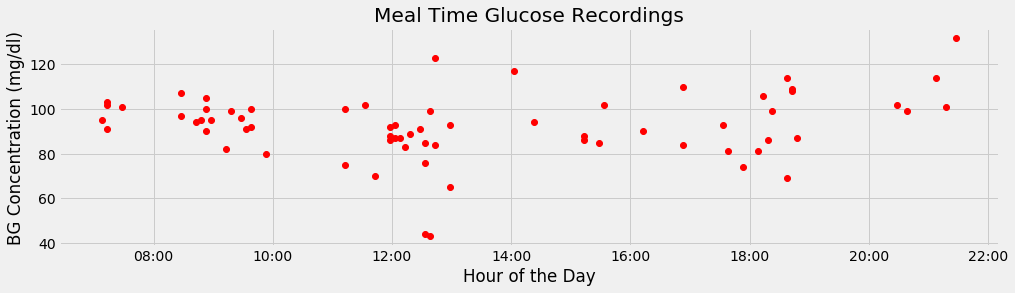

In [4]:
#Run the Data Preprocessing script first!

import warnings
warnings.filterwarnings('ignore')

#use the below couple lines to select which of the preprocessing file to use, comment the others

#%run ./Data_PreProcessing_Set_Mealtime.ipynb
#df_P_meals_w_deletion_v3 = copy.deepcopy(df_P_meals_w_deletion_v2)


%run ./Data_PreProcessing_Adjusted_Mealtime.ipynb
df_P_meals_w_deletion_v3 = copy.deepcopy(increase_pts_df)

### Distribution of the peak elapsed time duration and BG increase between meal and peak.

The average duration between the meal and peak is: 42.0 minutes with a std of 16.0 minutes.


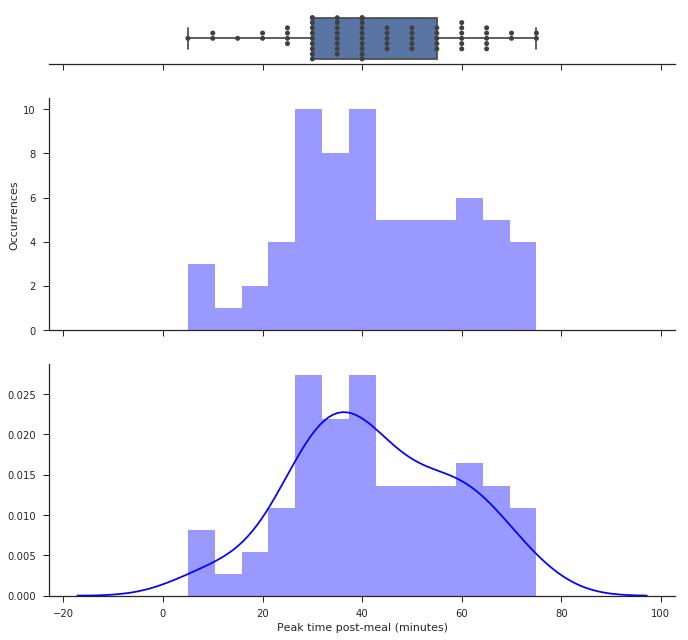

In [5]:
print "The average duration between the meal and peak is:", round(np.mean(peak_elapsed_time),0), "minutes with a std of", round(np.std(peak_elapsed_time),0), "minutes."

peak_measure = 1

def signal_distr(signal_content, peak_measure):

    import seaborn as sns

    sns.set(style="ticks")

    f, (ax_box, ax_hist1, ax_hist2) = plt.subplots(3, sharex=True, 
                                        gridspec_kw={"height_ratios": (.10, .45, .45)}, figsize=(10,10))

    b = sns.boxplot(signal_content, ax=ax_box)
    sns.swarmplot(signal_content, ax=ax_box, color=".25")
    if (peak_measure == 1):
        bin_size = len(signal_content)/ 5
    else:
        bin_size = len(signal_content)/ 3       
    h1 = sns.distplot( signal_content, ax=ax_hist1, bins=bin_size, kde=False, color='b')
    h2 = sns.distplot( signal_content, ax=ax_hist2, bins=bin_size, kde=True, color='b')

    h1.set(xlabel='', ylabel='Occurrences')
    if (peak_measure == 1):
        h2.set(xlabel='Peak time post-meal (minutes)', ylabel='')
    elif (peak_measure == 2):
        h2.set(xlabel='BG Difference (mg/dl)', ylabel='')        
    else:
        h2.set(xlabel='Meal Carbs (grams)', ylabel='')
    # Y axis in h2 is unitless measurement but any mesaurable area under the curve can be interpreted as a probability estimate.
    b.set(xlabel='')

    ax_box.set( yticks=[])
    sns.despine(ax=ax_hist1)
    sns.despine(ax=ax_hist2)
    sns.despine(ax=ax_box, left=True)

    #reset to original plotting format, instead of seaborn

    sns.reset_orig()

signal_distr(peak_elapsed_time, peak_measure)

### Distribution of BG difference between peak and meal concentrations

Mean of BG difference between meal and postprandial peak is: 55.2 mg/dl, with a std of 30.2 mg/dl.


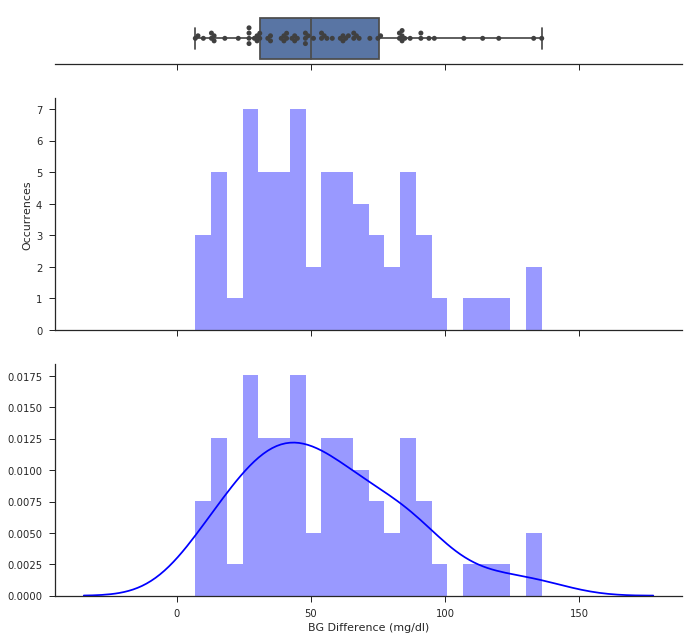

In [6]:
Peak_difference = []

peak_measure = 2

for x in range(peak_points_df['Date'].size):
    meal_gl = df_P_meals_w_deletion_v2['mg/dL'][x]
    peak_gl = peak_points_df['mg/dL'][x]
        
    #print "Meal BG is:", meal_gl, "at", df_P_meals_w_deletion_v2['Date'][x]
    #print "peak BG is:", peak_gl, "at", peak_points_df['Date'][x]
    
    difference_gl = peak_gl - meal_gl
    
    Peak_difference.append(difference_gl)

print "Mean of BG difference between meal and postprandial peak is:", round(np.mean(Peak_difference),1), "mg/dl, with a std of", round(np.std(Peak_difference),1), "mg/dl."    

#Visualizing the distribution of BG differences between the meal and peak

signal_distr(Peak_difference, peak_measure)

# Plotting: Actual meal time recordings & Postprandial Signals & Peaks

Plot the full postprandial signal, from meal time until the next significant BG increase past the peak (mostly it is following meal).

In [7]:
#This portion of the code finds the limit of each postprandial signal
gl_2nd_increase = 15 #second increase of 10mg/dl, ******Change this to 10, 15, and 20, notice changes
after_reading = 480 #size of the plot after meal time in minutes, i.e: up to 10 hours
stop_plot_date = []

#for x in range(0,2):
for x in range(peak_points_df['Date'].size):#excluding the last meal
    stop = 0
    
    #need to detect when there is a significant increase between current and compared glucose levels
    current_gl_Date = peak_points_df['Date'][x]
    current_gl = df_P.loc[df_P['Date'] == current_gl_Date]['mg/dL'].values[0] 
    
    compared_gl_date = current_gl_Date

    #Here, we check if there is a second BG increase after the peak, if found => stop plot at that point
    for d in drange(0,(after_reading-peak_elapsed_time[x]), 5):
        #print "first point to compare, date:", current_gl_Date, "bg is:", current_gl
        #for l in drange(0, (after_reading-peak_elapsed_time[x]), 5):
        for l in drange(0, 45, 5):
            compared_gl_date += datetime.timedelta(minutes=incr)
            compared_gl = df_P.loc[df_P['Date'] == compared_gl_date]['mg/dL'].values[0]  
            #print "Comparison to second point, date:", compared_gl_date, "bg is:", compared_gl           
            
            #if nan, stop here
            if (math.isnan(compared_gl)):
                stop = 1
                #Need to stop the plot at this current_gl date, so let's save it
                stop_plot_date.append(compared_gl_date - datetime.timedelta(minutes=incr))
                break      
            
            if (compared_gl - current_gl > gl_2nd_increase):
                #Find lowest point between current_gl and compared_gl
                lowest2nd_pt = current_gl
                lowest2nd_pt_date = current_gl_Date
                current_gl_temp_date = current_gl_Date
                #print "Enter Loop"
                for s in drange (0,(compared_gl_date - current_gl_Date).seconds / 60,5):
                    current_gl_temp_date += datetime.timedelta(minutes=incr)
                    current_gl_temp = df_P.loc[df_P['Date'] == current_gl_temp_date]['mg/dL'].values[0]
                    #print "current is: date", current_gl_temp_date, "bg is:", current_gl_temp
                    #print "lowest 2n is: date", lowest2nd_pt_date, "bg is:", lowest2nd_pt
                    if (current_gl_temp <= lowest2nd_pt):
                        lowest2nd_pt = current_gl_temp
                        lowest2nd_pt_date = current_gl_temp_date
                stop = 1
                #Need to stop the plot at this current_gl date, so let's save it
                stop_plot_date.append(lowest2nd_pt_date)
                break
        if (stop == 1):
            #print "Stop here", current_gl_Date
            #print "meal,", x
            break
        current_gl_Date += datetime.timedelta(minutes=incr)    
        current_gl = df_P.loc[df_P['Date'] == current_gl_Date]['mg/dL'].values[0] 
    
        compared_gl_date = current_gl_Date    
            
        if (d == after_reading-peak_elapsed_time[x]):
            #print "All the way"
            stop_plot_date.append(current_gl_Date)
            #print "meal,", x

stop_plot_bg_list = [] 

for k in range(len(stop_plot_date)):            
    stop_plot_bg = df_P.loc[df_P['Date'] == stop_plot_date[k]]['mg/dL'].values[0]
    stop_plot_bg_list.append(stop_plot_bg)
#print stop_plot_bg_list


#removing last meal info since it may not have a long enough postprandial signal
#df_P_meals_w_deletion_v3.drop(df_P_meals_w_deletion_v3.index[-1], axis=0,inplace=True)
#print df_P_meals_w_deletion_v3['Date'].size

The cell above derives the stop points of postprandial signals of all the meals. The stop points are stored in: stop_plot_date 

The cell below creates a dataframe that contains all the points of the postprandial signals for all the meals, from meal time to stop point. The dataframe is: df_all_plots_v2 

In [8]:
Plot_window = [i for i in np.arange(0, after_reading+incr, incr)]

def Plot_extraction_v2(df_P1_w_all_deletion, df_all_plots_v2):
    print "size is", df_P1_w_all_deletion['Date'].size
    print "stop plot size is ", len(stop_plot_date)
    for x in range(df_P1_w_all_deletion['Date'].size):
        nancount = 0 #if there are nan readings, stop at the first one
        a = df_P1_w_all_deletion['Date'][x]
        
        #Check if it's last reading, do not consider last meal
        if (x<(df_P1_w_all_deletion['CHO (g)'].size)):              
            b = a
            reading_list = []
            for j in Plot_window:
                reading = df_P.loc[df_P ['Date'] == b]['mg/dL']
                c = stop_plot_date[x]  #Stop at this date because there is another glucose increase right after it       
                try:
                    reading.values[0]
                except IndexError:
                    #print "Index out of range"
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue

                if (((c - b).total_seconds() < 0)) : 
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue
                else:
                    #store this value on the jth column of xth row of the new dataframe
                    reading_list.append(reading.values[0])
                    b += datetime.timedelta(minutes=incr)
        #print reading_list
        df_all_plots_v2.loc[x]=reading_list
    
    ##If the postprandial signal has many missing points within it, in the middle, remove it
    
    print "Total meals to be plotted are:", df_all_plots_v2.shape[0], "\n"

In [9]:
stop_pt = []
for k in range(len(stop_plot_date)):
    stop_pt.append(((stop_plot_date[k] - df_P_meals_w_deletion_v3['Date'][k]).seconds)/60)

def plotting(df_all_plots_v2, df_P1_w_all_deletion):
    first = True
    plt.figure(figsize=(20,12))
    #for j in range(0,5):
    for j in range(len(df_all_plots_v2)):
        #print df_all_plots_v2.iloc[j]
        #print df_P1_w_all_deletion.iloc[j]
        
        #print peak_points_df['mg/dL'][j]
        row = df_all_plots_v2.iloc[j]
 
        if (first==True):
            #Recorded meal time reading
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=12, label ='Meal Recordings')
            #Lowest surrounding point of increase
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=15, label ='Glucose Peaks')
            first = False
            row.plot(label='Meal Time Carbs {} g'.format(round((df_P1_w_all_deletion['CHO (g)'][j]),2)))
            continue
        
        row.plot(label='Meal Time Carbs {} g'.format(round((df_P1_w_all_deletion['CHO (g)'][j]),2)))
        plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=12)
        plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=15)            
        
        #plt.plot(stop_pt[j], stop_plot_bg_list[j], 'b*', markersize=15)
 

    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Post-meal BG variation of Different Meals'.format(after_reading)
    plt.title(title);

    #Uncomment below to save plot
    #plt.savefig('Patient_1_Plotsaftermeal_iter0to5.png')

size is 68
stop plot size is  68
Total meals to be plotted are: 68 



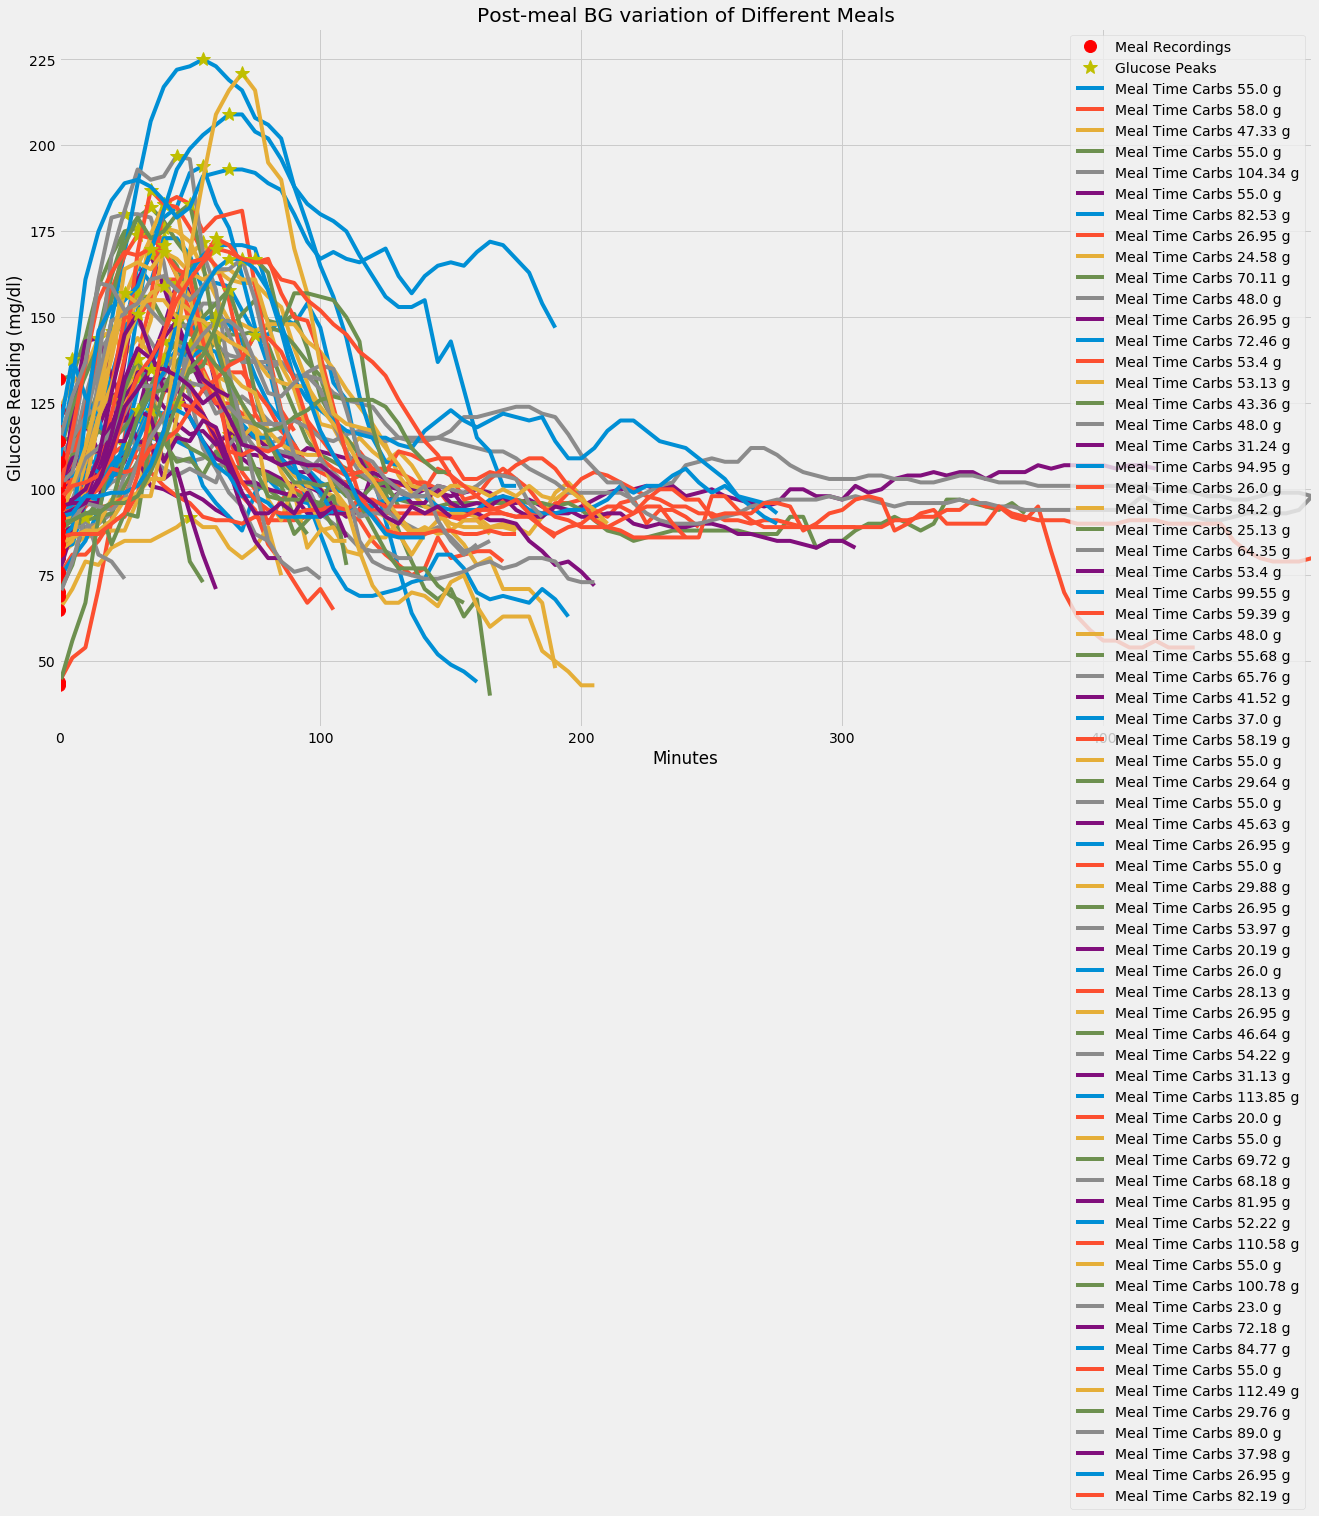

In [10]:
df_all_plots_v2 = pd.DataFrame(columns=Plot_window)

#df_all_plots_v2: contains the full postprandial signals for all meals
#df_P_meals_w_deletion_v3: contains the meal time readings and their info

Plot_extraction_v2(df_P_meals_w_deletion_v3, df_all_plots_v2)
plotting(df_all_plots_v2, df_P_meals_w_deletion_v3)

#print "size of df containing meals is:", df_P_meals_w_deletion_v3.shape[0]
#print "size of df containing plots of all meals is:", df_all_plots_v2.shape[0]

## Various Normalization Methods of the signals

L-2 Normalization: It normalizes the signal by dividing each element over the sqrt(sum(x^2)), so the sum of elements of the normalized row equal to 1.

In [11]:
from sklearn import preprocessing

def alignmentandnormalization(df_period_plots):

    global signals_normalized_df 
    signals_normalized_df = copy.deepcopy(df_period_plots)
    global signals_aligned_df 
    signals_aligned_df = copy.deepcopy(df_period_plots)
    
    signalsdf_wo_nan = pd.DataFrame()

   
    for j in range(len(df_period_plots)):
    #signalsdf_wo_nan[j] = df_all_plots_v2.iloc[j][~np.isnan(df_all_plots_v2.iloc[j])]

        signal_wo_nan = df_period_plots.iloc[j][~np.isnan(df_period_plots.iloc[j])]
        aligned_signal = [x - df_period_plots.iloc[j,0] for x in signal_wo_nan]

        #with alignment and without
        normalized_signal = preprocessing.normalize(aligned_signal, norm='l2')#with alignment of signals  
        #normalized_signal = preprocessing.normalize(signal_wo_nan, norm='l2')#without alignment

        signals_aligned_df.iloc[j,0:len(aligned_signal)] = aligned_signal 
        signals_aligned_df.iloc[j,len(aligned_signal):df_period_plots.shape[1]] = np.nan

        signals_normalized_df.iloc[j,0:normalized_signal.size] = normalized_signal 
        signals_normalized_df.iloc[j,normalized_signal.size:df_period_plots.shape[1]] = np.nan
    
    #print "size of signals_normalized_df", len(signals_normalized_df)
    
#print normalized_signal[:]
#print signals_normalized_df

#print df_normalized

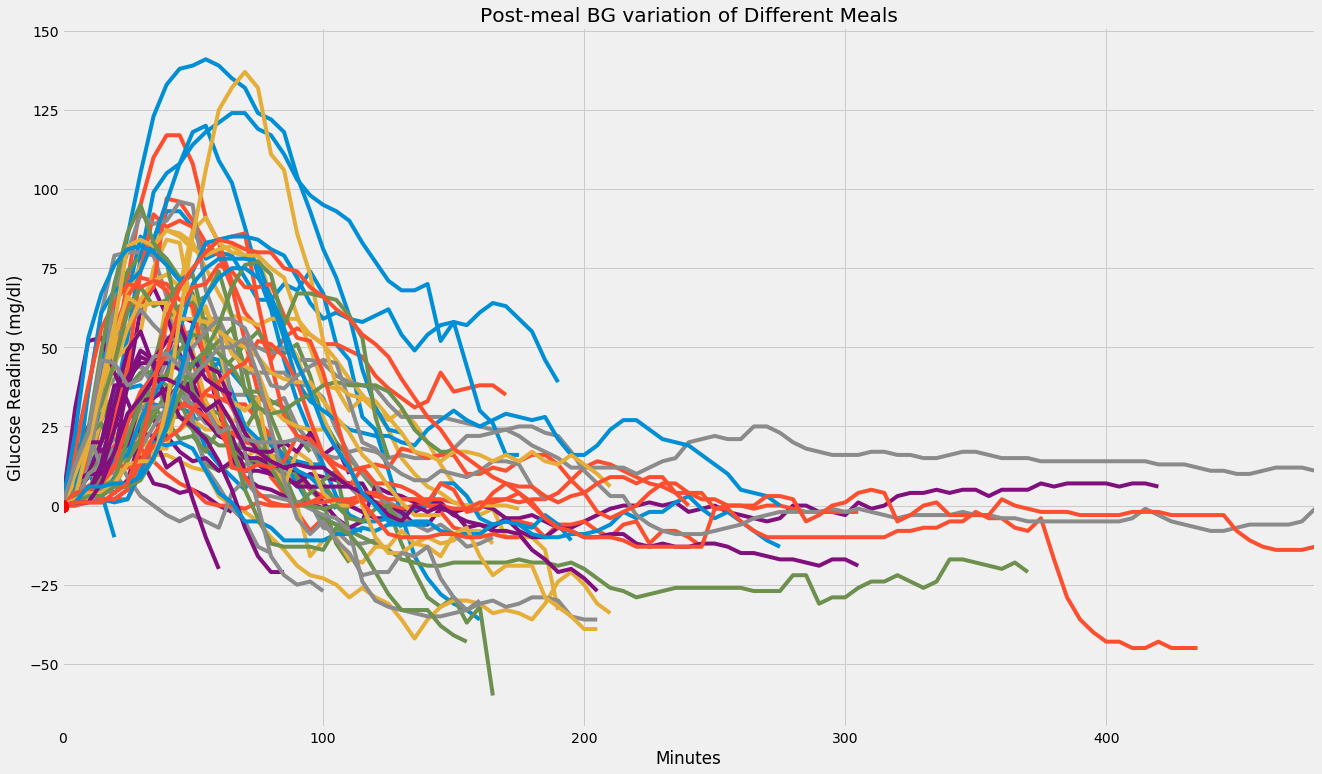

In [12]:
#alignmentandnormalization(df_all_plots_v2)
import warnings
warnings.filterwarnings('ignore') 

def plotsaligned(periodmeals, full_postprandials):
    #print "\nPostprandial signals aligned...\n"
    
    alignmentandnormalization(full_postprandials)
    
    plt.figure(figsize=(20,12))

    #for j in range(1,20):
    for j in range(len(signals_aligned_df)):
        #print df_all_plots_v2.iloc[j]
        row = signals_aligned_df.iloc[j]
        #if (round((df_P_meals_w_deletion_v3['CHO (g)'][j]),2) < 35):
        row.plot(label = '')
        #row.plot(label='Meal Time Carbs {} g'.format(round((periodmeals['CHO (g)'][j]),2)))
        plt.plot(0, signals_aligned_df[0][j], 'ro', markersize=12)     


    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Post-meal BG variation of Different Meals'.format(after_reading)
    plt.title(title);
    
plotsaligned(df_P_meals_w_deletion_v3, df_all_plots_v2)   

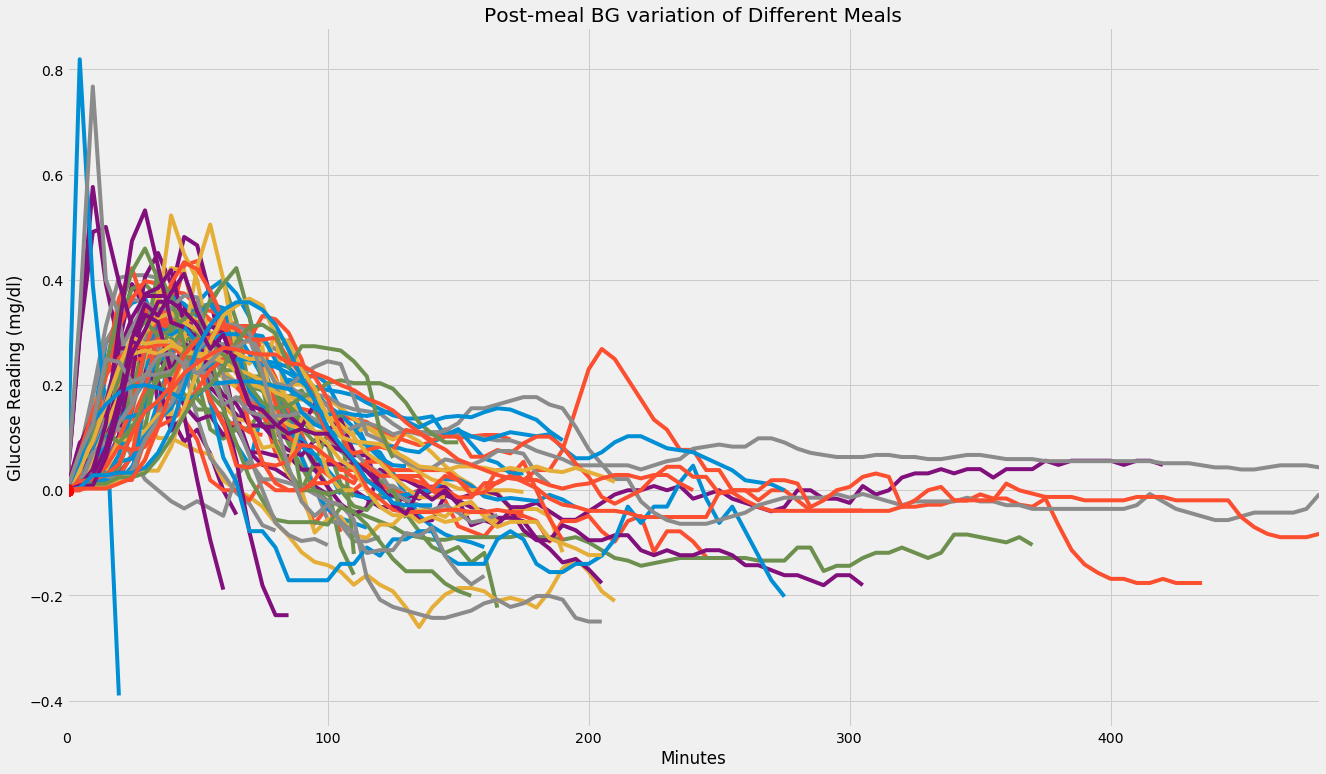

In [13]:
def plotsnormalized(periodmeals, full_postprandials):
    #print "\nPostprandial signals aligned and normalized...\n"
    alignmentandnormalization(full_postprandials)
    
    plt.figure(figsize=(20,12))
    #print "size of current df is:", len(signals_normalized_df)
    #print_full(signals_normalized_df)
      
    #for j in range(11,20):
    for j in range(len(signals_normalized_df)):
        #print df_all_plots_v2.iloc[j]
        row = signals_normalized_df.iloc[j]
        #print "pritning value of", j,"signal:", (round((periodmeals['CHO (g)'][j]),2))
        row.plot(label ='')
        #row.plot(label='Meal Time Carbs {} g'.format(round((periodmeals['CHO (g)'][j]),2)))
        plt.plot(0, signals_normalized_df[0][j], 'ro', markersize=12)     


    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Post-meal BG variation of Different Meals'.format(after_reading)
    plt.title(title);

#output_df = pd.DataFrame    
plotsnormalized(df_P_meals_w_deletion_v3, df_all_plots_v2)
#output_df = copy.deepcopy(signals_normalized_df)
#print_full(output_df)


**Normalization is not recommended because it removes the BG difference between various signals**

## Dividing the day into Breakfast, Lunch, Dinner

In [14]:
df_all_clean_1day = copy.deepcopy(df_P_meals_w_deletion_v3)

d = datetime.datetime.today()
for i in range(len(df_all_clean_1day)):
    dt = df_all_clean_1day.Date[i].replace(year=d.year, month=d.month, day=d.day)    
    df_all_clean_1day.Date[i] = dt

#output to static HTML file
output_file("Aggregated_Meal_Recordings.html")

plot = figure(plot_width=1250, plot_height=600, title="Meal Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

good_readings = ColumnDataSource(dict(x=df_all_clean_1day.Date, y=df_all_clean_1day['mg/dL'], z=df_all_clean_1day['CHO (g)'], k = df_all_clean_1day['Fat (g)'], d = df_all_clean_1day['Protein (g)']))

g1 = plot.asterisk(x=df_all_clean_1day.Date, y=df_all_clean_1day['mg/dL'], line_color="#f0027f", fill_color=None, line_width=8, source=good_readings)

plot.add_tools(HoverTool( renderers = [g1],  tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('CHO (g)', '@z'),
    ('Fat (g)', '@k'),
    ('Protein (g)', '@d')
]))

plot.xaxis.axis_label = "Hour of the Day"
plot.yaxis.axis_label = "BG Concentration (mg/dL)"

show(plot)

In [47]:
#The three main data sets are below:

breakfast_df = copy.deepcopy(df_all_plots_v2)
lunch_df = copy.deepcopy(df_all_plots_v2)
dinner_df = copy.deepcopy(df_all_plots_v2)

peak_elapsed_breakfast = copy.deepcopy(peak_elapsed_time)
peak_elapsed_lunch = copy.deepcopy(peak_elapsed_time)
peak_elapsed_dinner = copy.deepcopy(peak_elapsed_time)

breakfast_peak_df = copy.deepcopy(peak_points_df)
lunch_peak_df = copy.deepcopy(peak_points_df)
dinner_peak_df = copy.deepcopy(peak_points_df)

breakfast_start_hour = 5
breakfast_max_hour = 10.5

lunch_start_hour = 10.5
lunch_max_hour = 14.5

#snack_start_hour = 14
#snack_max_hour = 16

dinner_start_hour = 16
dinner_max_hour = 23

remove_from_breakfast_x = []
remove_from_lunch_x = []
remove_from_dinner_x = []

keep_breakfast_x = []
keep_lunch_x = []
keep_dinner_x =[]

for x in range(len(df_P_meals_w_deletion_v3)):
    a = df_P_meals_w_deletion_v3['Date'][x]
    meal_Date = df_P.loc[df_P['Date'] == a]['Date']
    meal_dt=meal_Date.values[0]
    mdt = datetime.datetime.utcfromtimestamp(meal_dt.astype('O')/(1e9))
    #print mdt.strftime('%H:%M:%S')
    meal_hr = mdt.strftime('%H')    
    #print int(meal_hr)
    if (int(meal_hr)>breakfast_max_hour or int(meal_hr)<breakfast_start_hour):
        #print "This does not belong to breakfast"
        #Drop all these data points that do not belong to breakfast period
        remove_from_breakfast_x.append(x)
    else:    
        keep_breakfast_x.append(x)
        
    if (int(meal_hr)>lunch_max_hour or int(meal_hr)<lunch_start_hour):
        #print "This does not belong to breakfast"
        #Drop all these data points that do not belong to breakfast period  
        remove_from_lunch_x.append(x)
    else:    
        keep_lunch_x.append(x)
    
    if (int(meal_hr)>dinner_max_hour or int(meal_hr)<dinner_start_hour):
        #print "This does not belong to breakfast"
        #Drop all these data points that do not belong to breakfast period
        remove_from_dinner_x.append(x)
    else:    
        keep_dinner_x.append(x)
        
#print remove_from_breakfast_x
#print keep_breakfast_x
        
###############Breakfast
breakfast_df.drop(breakfast_df.index[remove_from_breakfast_x],axis=0,inplace=True)
breakfast_df = breakfast_df.reset_index(drop=True)  
print "This patient has", len(breakfast_df), "breakfast readings.\n"
#print "The indeces of breakfast within the full dataframe are:", keep_breakfast_x

breakfast_peak_df.drop(breakfast_peak_df.index[remove_from_breakfast_x],axis=0,inplace=True)
breakfast_peak_df = breakfast_peak_df.reset_index(drop=True)

peak_elapsed_breakfast = np.delete(peak_elapsed_breakfast, remove_from_breakfast_x)

###############Lunch
lunch_df.drop(lunch_df.index[remove_from_lunch_x],axis=0,inplace=True)
lunch_df = lunch_df.reset_index(drop=True)  
print "This patient has", len(lunch_df), "lunch readings.\n"
#print "The indeces of lunch within the full dataframe are:", keep_lunch_x


lunch_peak_df.drop(lunch_peak_df.index[remove_from_lunch_x],axis=0,inplace=True)
lunch_peak_df = lunch_peak_df.reset_index(drop=True)

peak_elapsed_lunch = np.delete(peak_elapsed_lunch, remove_from_lunch_x)


###############Dinner
dinner_df.drop(dinner_df.index[remove_from_dinner_x],axis=0,inplace=True)
dinner_df = dinner_df.reset_index(drop=True) 
print "This patient has", len(dinner_df), "dinner readings.\n"
#print "The indeces of dinner within the full dataframe are:", keep_dinner_x

dinner_peak_df.drop(dinner_peak_df.index[remove_from_dinner_x],axis=0,inplace=True)
dinner_peak_df = dinner_peak_df.reset_index(drop=True)

peak_elapsed_dinner = np.delete(peak_elapsed_dinner, remove_from_dinner_x)
    
#dinner_df.to_csv('Patient1_dinner_df.csv', sep='\t', encoding='utf-8')
#dinner_df.to_csv('Patient_dinner_df.csv', index=False)
#lunch_df.to_csv('Patient_lunch_df.csv', index=False)
#breakfast_df.to_csv('Patient_breakfast_df.csv', index=False)
    
all_breakfast_df = pd.DataFrame()
all_lunch_df = pd.DataFrame() 
all_dinner_df = pd.DataFrame() 

def period_meals_list(kept_period_meals):
    df_period_meals = pd.DataFrame()
    for k in range(len(kept_period_meals)):
        df_period_meals[k] = df_P_meals_w_deletion_v3.iloc[kept_period_meals[k]]    
    
    meals_df = copy.deepcopy(df_period_meals.T)
    #print  meals_df
    return meals_df

#print "This patient has the recorded the following meals for breakfast:"
all_breakfast_df = period_meals_list(keep_breakfast_x)

#print all_breakfast_df

#print "This patient has the recorded the following meals for lunch:"
all_lunch_df = period_meals_list(keep_lunch_x)

#print "This patient has the recorded the following meals for dinner:"
all_dinner_df = period_meals_list(keep_dinner_x)


This patient has 20 breakfast readings.

This patient has 24 lunch readings.

This patient has 20 dinner readings.



Visualizing breakfast meals...

[55.0, 55.0, 55.0, 48.0, 53.4, 48.0, 26.0, 48.0, 55.0, 55.0, 55.0, 26.0, 54.22, 55.0, 81.95, 55.0, 23.0, 55.0, 37.98, 26.95] 

Mean of BG difference between meal and post-breakfast peak is: 48.4 mg/dl, with a std of 13.8 mg/dl.


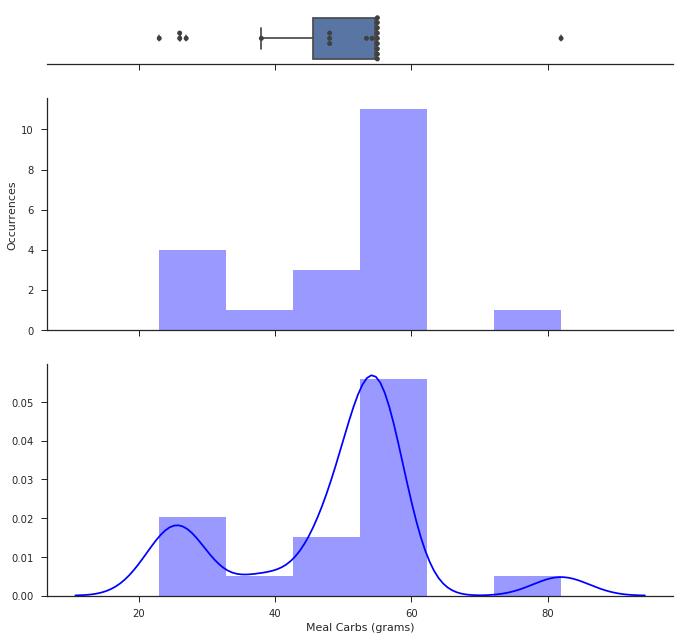

In [48]:
peak_measure = 3

def get_prandial_arr(period_df):
    global signal_arr
    signal_arr = period_df['CHO (g)'].values
    signal_arr = [ round(x,2) for x in signal_arr]
    print signal_arr, "\n"

print "Visualizing breakfast meals...\n"

if (all_breakfast_df.shape[0] > 2):
    get_prandial_arr(all_breakfast_df)
    print "Mean of BG difference between meal and post-breakfast peak is:", round(np.mean(signal_arr),1), "mg/dl, with a std of", round(np.std(signal_arr),1), "mg/dl."    
    signal_distr(signal_arr, peak_measure)
    
else:
    print "There are not enough meals within this prandial period to analyze!"


Visualizing lunch meals...

[58.0, 82.53, 26.95, 24.58, 26.95, 53.13, 31.24, 84.2, 53.4, 55.68, 41.52, 37.0, 29.64, 45.63, 26.95, 29.88, 28.13, 31.13, 69.72, 52.22, 100.78, 72.18, 112.49, 82.19] 

Mean of BG difference between meal and post-breakfast peak is: 52.3 mg/dl, with a std of 25.1 mg/dl.


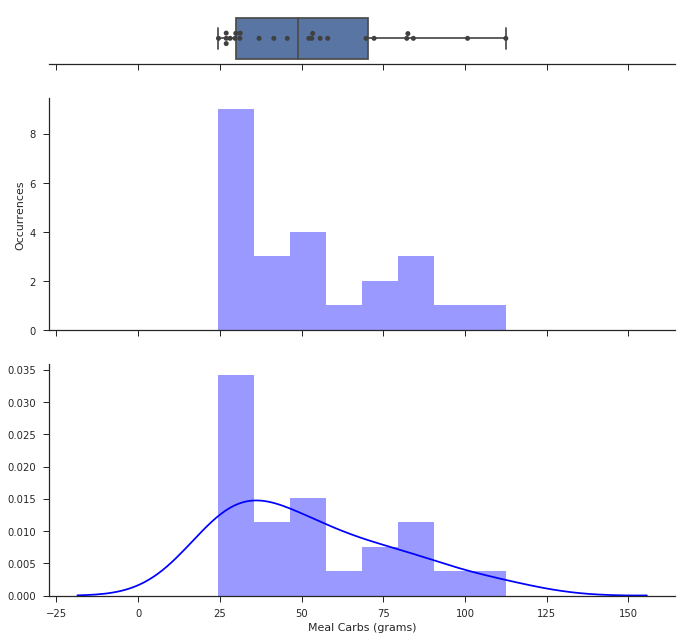

In [49]:
print "Visualizing lunch meals...\n"    

if (all_lunch_df.shape[0] > 2):
    get_prandial_arr(all_lunch_df)
    print "Mean of BG difference between meal and post-breakfast peak is:", round(np.mean(signal_arr),1), "mg/dl, with a std of", round(np.std(signal_arr),1), "mg/dl."    
    signal_distr(signal_arr, peak_measure)
    
else:
    print "There are not enough meals within this prandial period to analyze!"



Visualizing dinner meals...

[47.33, 104.34, 70.11, 72.46, 43.36, 94.95, 64.35, 99.55, 59.39, 65.76, 58.19, 53.97, 20.19, 46.64, 20.0, 68.18, 110.58, 84.77, 29.76, 89.0] 

Mean of BG difference between meal and post-breakfast peak is: 65.1 mg/dl, with a std of 25.9 mg/dl.


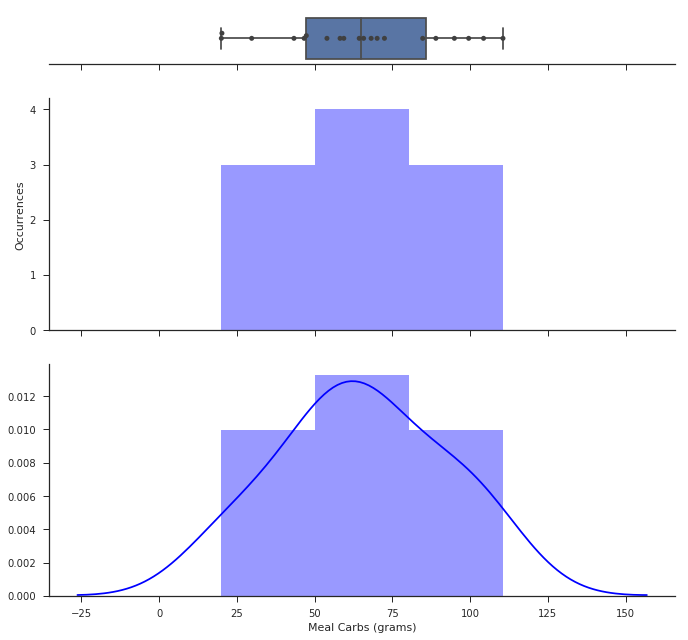

In [50]:
print "Visualizing dinner meals...\n"    

if (all_dinner_df.shape[0] > 2):
    get_prandial_arr(all_dinner_df)
    print "Mean of BG difference between meal and post-breakfast peak is:", round(np.mean(signal_arr),1), "mg/dl, with a std of", round(np.std(signal_arr),1), "mg/dl."    
    signal_distr(signal_arr, peak_measure)
    
else:
    print "There are not enough meals within this prandial period to analyze!"



In [51]:
def Plot_Period(period_to_plot, peaks_df, peaks_offset):

    period_df = copy.deepcopy(period_to_plot)
    peak_pts_df = copy.deepcopy(peaks_df)
    peak_elapsed_t = copy.deepcopy(peaks_offset)
    
    plt.figure(figsize=(20,12))
    #for j in range(0,5):
    for j in range(len(period_df)):
        row = period_df.iloc[j]
        row.plot()
        #row.plot(label='Meal Time at {}'.format(df_P1_w_all_deletion['Date'][j]))
        #Recorded meal time reading
        plt.plot(0, period_df[0][j], 'ro', markersize=10)
        plt.plot(peak_elapsed_t[j], peak_pts_df['mg/dL'][j], 'y*', markersize=20) 

    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    #plt.legend(loc='upper right')
    title = 'Glucose Lelvel Readings {} minutes after meal recording or until next meal recording'.format(after_reading)
    plt.title(title)

    plt.show()

Plotting of segmented after meal plots for Breakfast


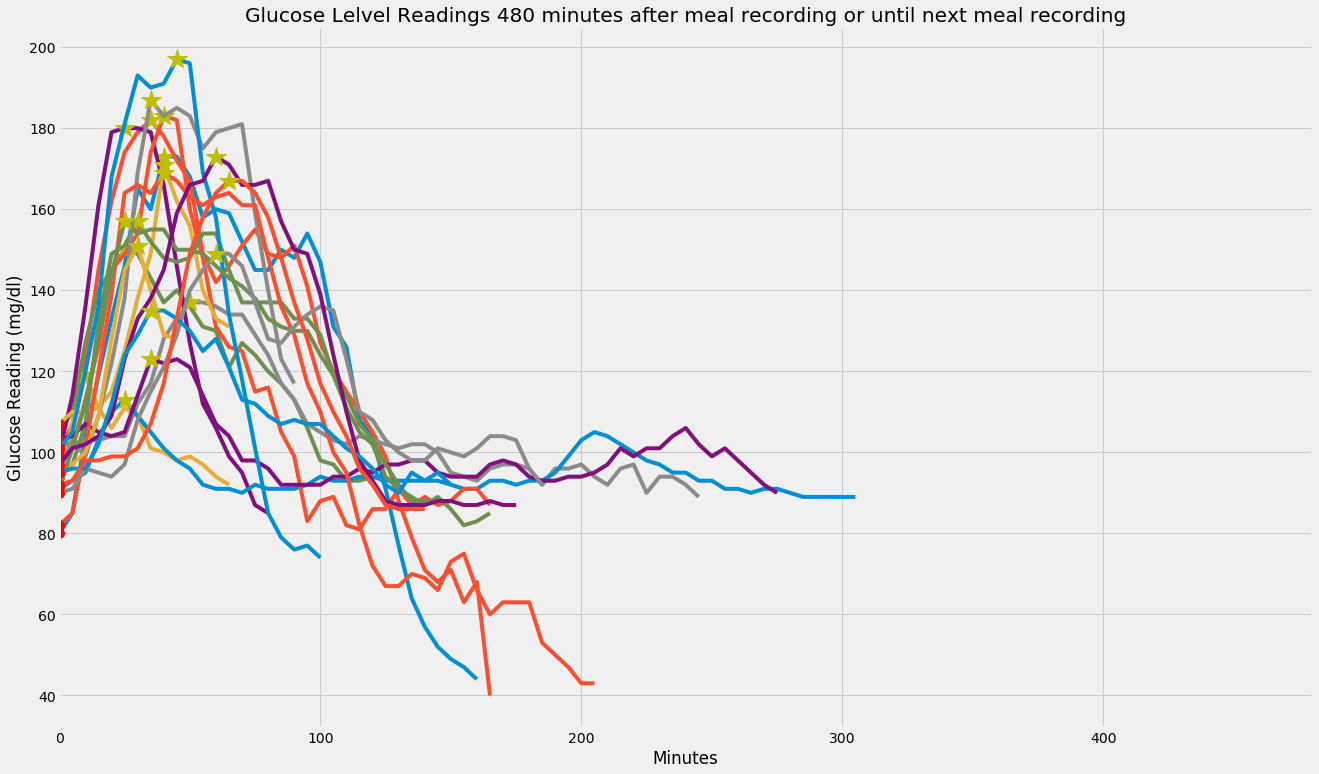

Plotting of segmented after meal plots for Lunch


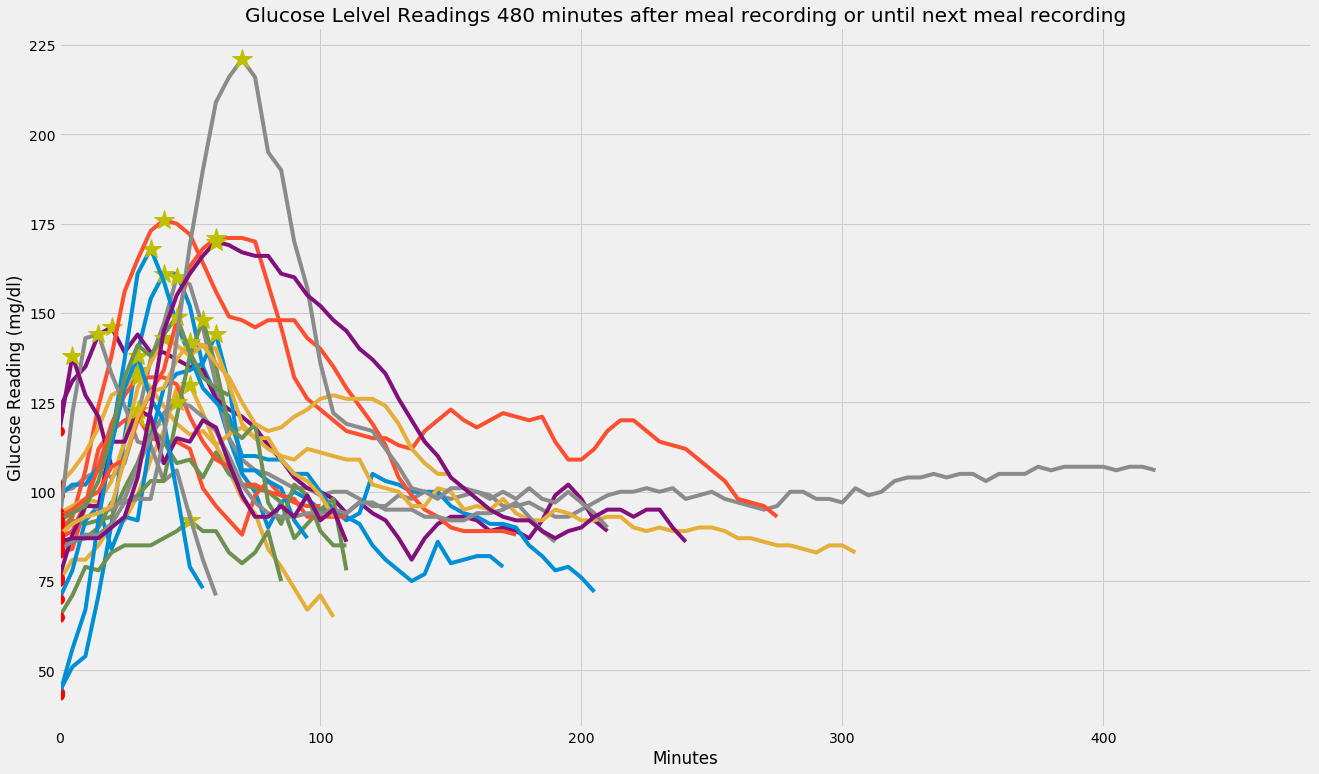

Plotting of segmented after meal plots for Dinner


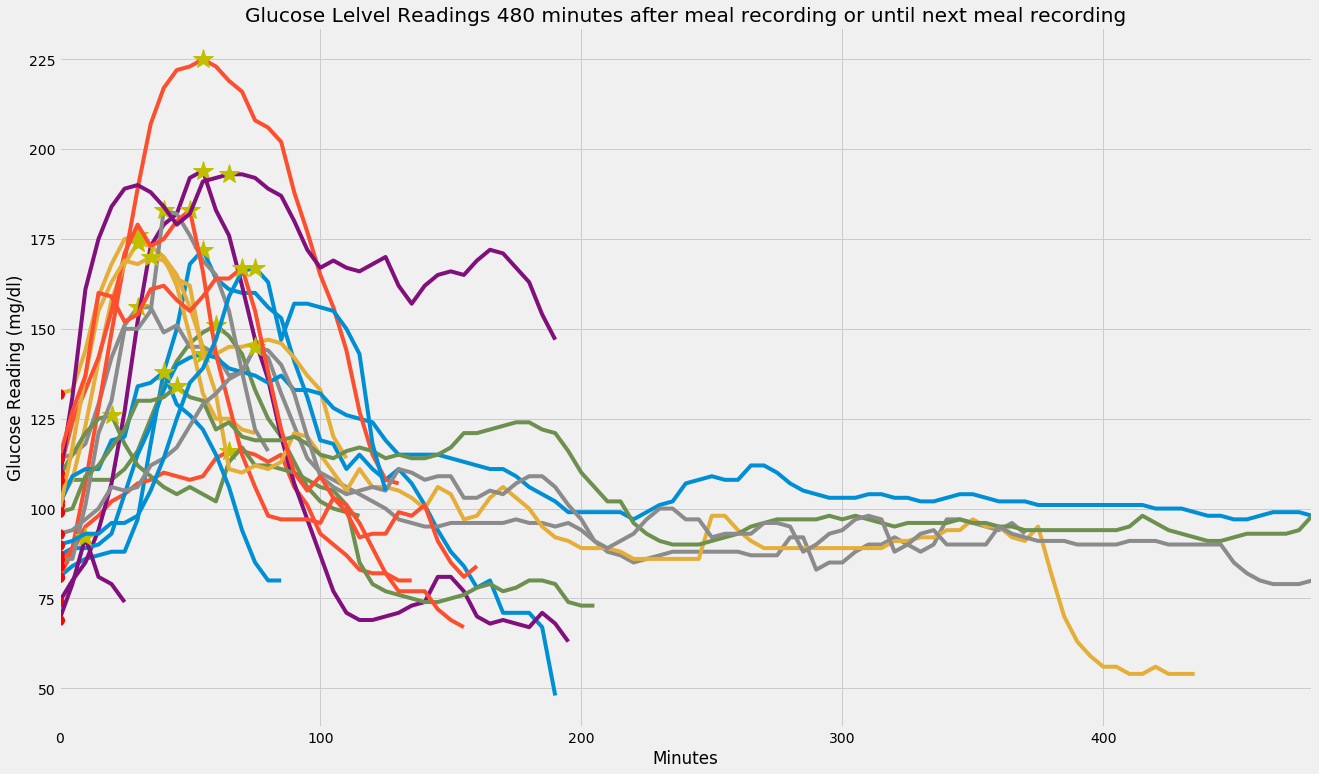

In [52]:
#Plot any preriod by replacing period_df by the desired period,
#arg1 is breakfast_df or lunch_df or dinner_df
#arg2 is breakfast_peak_df, lunch_peak_df, dinner_peak_df
#arg3 is peak_elapsed_breakfast, peak_elapsed_lunch, peak_elapsed_dinner

print "Plotting of segmented after meal plots for Breakfast"
Plot_Period(breakfast_df, breakfast_peak_df, peak_elapsed_breakfast)

print "Plotting of segmented after meal plots for Lunch"
Plot_Period(lunch_df, lunch_peak_df, peak_elapsed_lunch)

print "Plotting of segmented after meal plots for Dinner"
Plot_Period(dinner_df, dinner_peak_df, peak_elapsed_dinner)




**Plotting aligned plots for each period respectively**


Plotting aligned postprandial signals for breakfast, lunch, dinner, respectively...


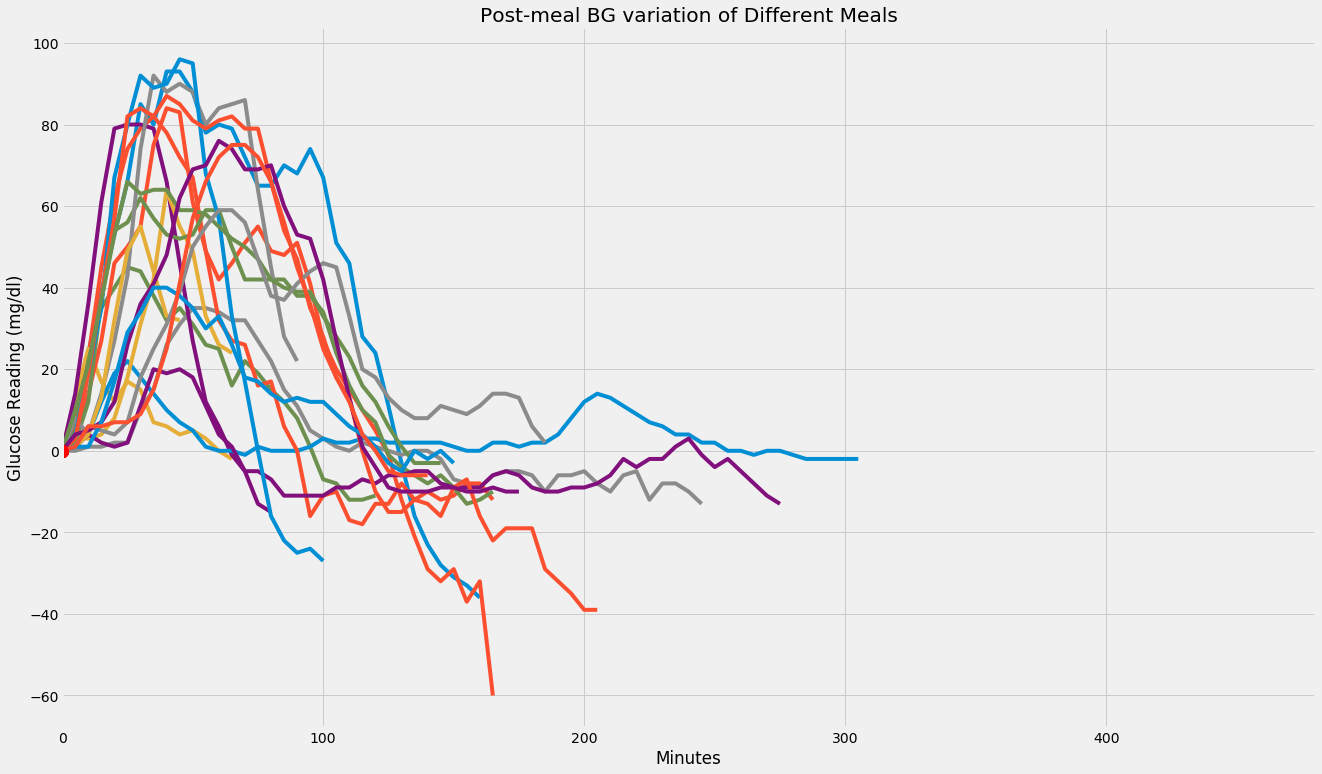

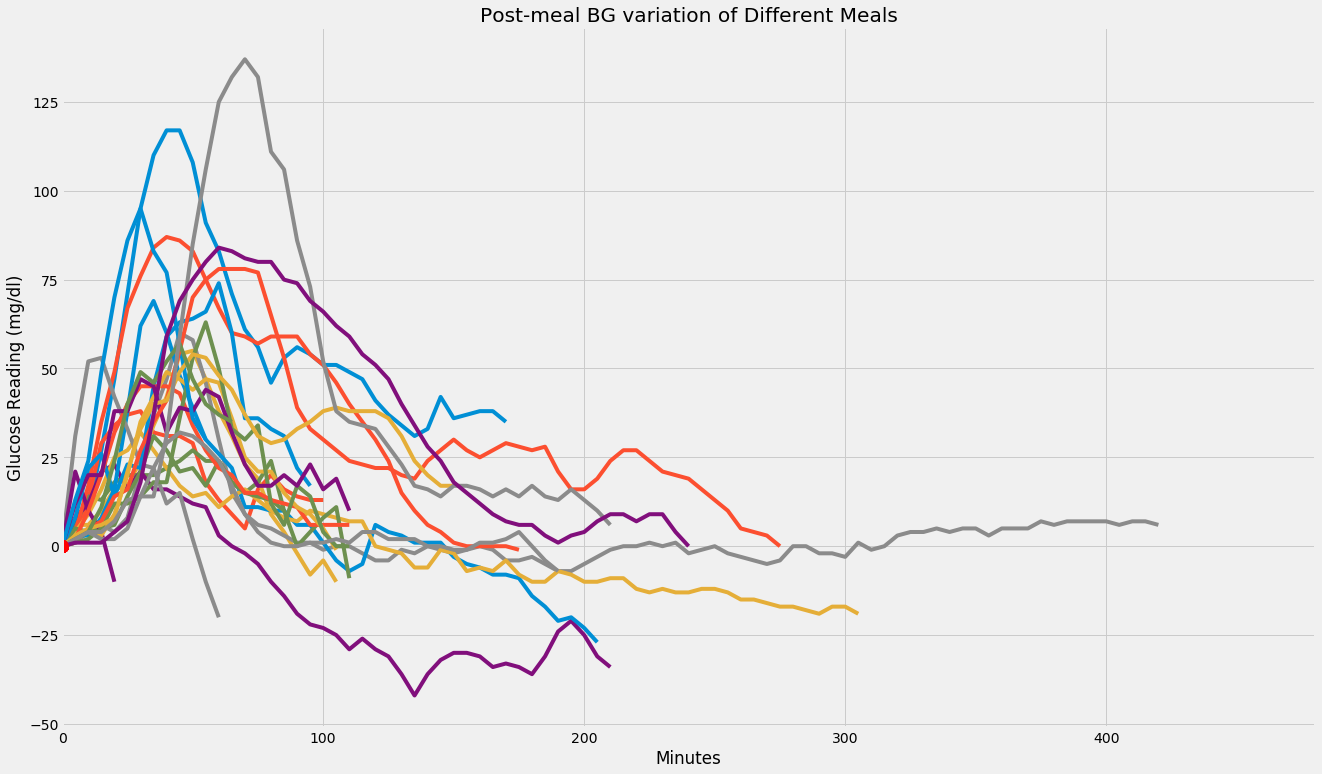

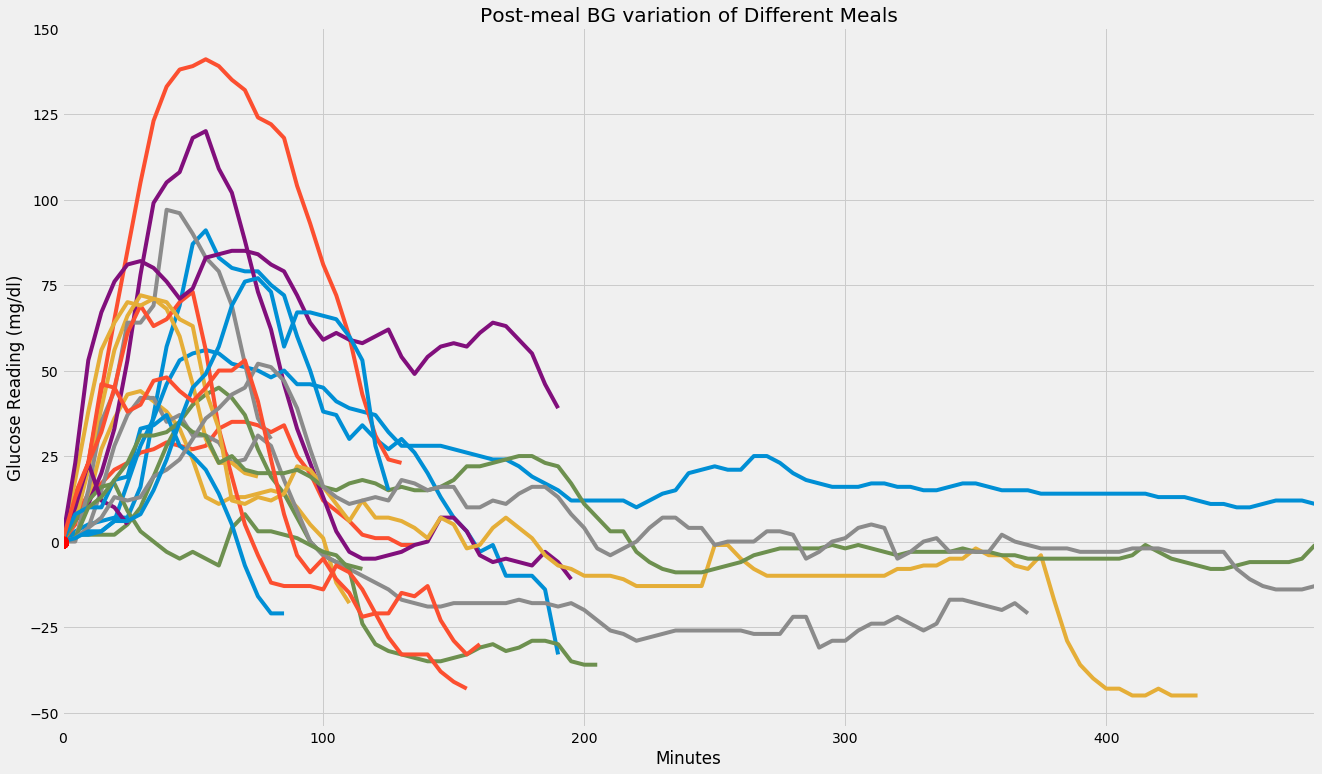

In [53]:
print "\nPlotting aligned postprandial signals for breakfast, lunch, dinner, respectively...\n", 
plotsaligned(all_breakfast_df, breakfast_df)#outputs aligned signals only
#plotsnormalized(all_breakfast_df, breakfast_df)#This outputs normalized signals of the aligned signals
  
#breakfast_signals_df = copy.deepcopy(signals_normalized_df)#this is for normalized output signals
breakfast_signals_df = copy.deepcopy(signals_aligned_df)#this is for aligned only output signals

plotsaligned(all_lunch_df, lunch_df)
#plotsnormalized(all_lunch_df, lunch_df)
  
lunch_signals_df = copy.deepcopy(signals_aligned_df)

plotsaligned(all_dinner_df, dinner_df)
#plotsnormalized(all_dinner_df, dinner_df)
   
dinner_signals_df = copy.deepcopy(signals_aligned_df)

**It can be concluded that scaling (normalization) or standardization (also referred to normalization sometimes) are both not appropriate in our case since we want to preserve the differences between the various signals.**

**Average of the aligned signals for each of the periods**

### Remove signals with extreme outliers from each of the prandial periods

In [54]:
#print_full(breakfast_signals_df)

#Replace time instances with several nan BG concentrations with full column of nan so it is not biased to specific signals
def replacenansignals(period_signal_df):

    for k in range(period_signal_df.shape[1]):
        #print breakfast_signals_df[breakfast_signals_df.columns[k]]
        xaxis_size =  period_signal_df.shape[0]
        total_nan = sum(pd.isnull(period_signal_df[period_signal_df.columns[k]]))
        available_readings = xaxis_size - total_nan
        #print available_readings

        if (available_readings < 5):#if there are less than 3 signals at some time instance, don't consider them. Only if more than 3
            period_signal_df[period_signal_df.columns[k]] = np.nan
        #print period_signal_df[period_signal_df.columns[k]]     

print "Breakfast, checking for sufficient data points in the signal..."        
replacenansignals(breakfast_signals_df)
print "Lunch, checking for sufficient data points in the signal..." 
replacenansignals(lunch_signals_df)
print "Dinner, checking for sufficient data points in the signal..." 
replacenansignals(dinner_signals_df)        

Breakfast, checking for sufficient data points in the signal...
Lunch, checking for sufficient data points in the signal...
Dinner, checking for sufficient data points in the signal...


**Remove outlier signals, which have significant differences than others**

Steps:
1. Find 95% and 5% percentile at each time increment
2. If a signal falls several times outside the 95% and 5%, more than 5 times i.e, remove it

In [55]:
import scipy.stats as st

def get_percentile(period_df):
    global signal_upper_p 
    signal_upper_p = []
    global signal_lower_p
    signal_lower_p = []

    for k in range(period_df.shape[1]):
        temp_signal = []
        temp_signal = period_df.iloc[:,k][~np.isnan(period_df.iloc[:,k])]

        #print "length of signal is:", len(temp_signal), "and its content is: \n", temp_signal
        
        if (len(temp_signal) >= 5):
            #95%percentile
            upper_p = np.percentile(temp_signal, 97.5)
            lower_p = np.percentile(temp_signal, 2.5)

            #print "upper p is:", upper_p, "and lower p is:", lower_p
            signal_upper_p.append(upper_p)
            signal_lower_p.append(lower_p)
    #return signal_upper_p, signal_lower_p

get_percentile(lunch_signals_df)

#print "Upper percentile: \n", signal_upper_p
#print "Lower percentile: \n", signal_lower_p
################

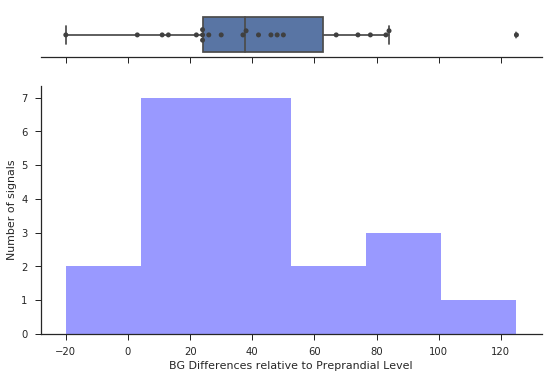

In [56]:
#display the box plot for the values at some time increment distribution, showing the 97.5% and 2.5% percentiles

import seaborn as sns

sns.set(style="ticks")

#print lunch_signals_df

time_instance = 12 #i.e: location is 12 * 5mins increments = 60mins

xaxis_size =  lunch_signals_df.shape[0]
total_nan = sum(pd.isnull(lunch_signals_df[lunch_signals_df.columns[time_instance]]))
available_readings = xaxis_size - total_nan
#print available_readings

if (available_readings >= 5):#if there are less than 3 signals at some time instance, don't consider them. Only if more than 3


    temp_signal = []
    temp_signal = lunch_signals_df.iloc[:,time_instance][~np.isnan(lunch_signals_df.iloc[:,time_instance])]
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})

    b = sns.boxplot(temp_signal, ax=ax_box)
    sns.swarmplot(temp_signal, ax=ax_box, color=".25")
    h = sns.distplot( temp_signal, ax=ax_hist, kde=False, color='b')

    h.set(xlabel='BG Differences relative to Preprandial Level', ylabel='Number of signals')
    b.set(xlabel='')

    ax_box.set( yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
else:
    print "Not enough readings at this time instance to visualize!"
sns.reset_orig()

In [57]:
#Count the signals that have values outside the percentiles, if many then remove

def get_extreme_outliers(period_df):
    #print "The size of the percentile array for this period is:", len(signal_upper_p)
    print "\nThe period contains the following number of signals:", period_df.shape[0], "\n"
    global extreme_outliers
    extreme_outliers = []
    for k in range(period_df.shape[0]):
        count = 0
        comparisons_pts = 0
        for i, item in enumerate(period_df.iloc[k]):
            if (i<len(signal_lower_p)  and (~math.isnan(item))):
                comparisons_pts += 1
                if ((item < signal_lower_p[i] or item > signal_upper_p[i])):
                    count += 1

        #print "The signal", k, "has", count , "extreme outliers out of", comparisons_pts,"points.\n"
      
        #condition to remove signals which are extreme and very rare, have over half (or one fourth) of their points outside the 95% percentile of the rest of signal points
        if (count>(comparisons_pts/3)):            
            extreme_outliers.append(k)
    print "The following signals are considered abnormal for having extreme outliers over the full signal spectrum:", extreme_outliers

#save the original period dataframes before removing the outliers
breakfast_org_df = copy.deepcopy(breakfast_signals_df)
lunch_org_df = copy.deepcopy(lunch_signals_df)
dinner_org_df = copy.deepcopy(dinner_signals_df)

#Breakfast
get_percentile(breakfast_signals_df)
print "\nRemove any abnormal signals from BREAKFAST period if they have several extreme outliers..."    
get_extreme_outliers(breakfast_signals_df)

breakfast_signals_df.drop(breakfast_signals_df.index[extreme_outliers], axis=0,inplace=True)
print "\nRemaining breakfast signals are:", breakfast_signals_df.shape[0]
#Breakfast Dataframe with dates and meal info
#print "Size of breakfast df containing dates is:", all_breakfast_df.shape[0]
all_breakfast_df.drop(all_breakfast_df.index[extreme_outliers], axis=0,inplace=True)
#print "New size of breakfast df containing dates is:", all_breakfast_df.shape[0]

#Lunch
get_percentile(lunch_signals_df)
print "\n\nRemove any abnormal signals from LUNCH period if they have several extreme outliers..." 
get_extreme_outliers(lunch_signals_df)
lunch_signals_df.drop(lunch_signals_df.index[extreme_outliers], axis=0,inplace=True)
print "\nRemaining lunch signals are:", lunch_signals_df.shape[0]
#Lunch Dataframe with dates and meal info
#print "Size of lunch df containing dates is:", all_lunch_df.shape[0]
all_lunch_df.drop(all_lunch_df.index[extreme_outliers], axis=0,inplace=True)
#print "New size of lunch df containing dates is:", all_lunch_df.shape[0]

#Dinner
get_percentile(dinner_signals_df)
print "\n\nRemove any abnormal signals from DINNER period if they have several extreme outliers..."     
get_extreme_outliers(dinner_signals_df) 
dinner_signals_df.drop(dinner_signals_df.index[extreme_outliers], axis=0,inplace=True)
print "\nRemaining dinner signals are:", dinner_signals_df.shape[0]
#Dinner Dataframe with dates and meal info
#print "Size of dinner df containing dates is:", all_dinner_df.shape[0]
all_dinner_df.drop(all_dinner_df.index[extreme_outliers], axis=0,inplace=True)
#print "New size of dinner df containing dates is:", all_dinner_df.shape[0]    


Remove any abnormal signals from BREAKFAST period if they have several extreme outliers...

The period contains the following number of signals: 20 

The following signals are considered abnormal for having extreme outliers over the full signal spectrum: []

Remaining breakfast signals are: 20


Remove any abnormal signals from LUNCH period if they have several extreme outliers...

The period contains the following number of signals: 24 

The following signals are considered abnormal for having extreme outliers over the full signal spectrum: [5]

Remaining lunch signals are: 23


Remove any abnormal signals from DINNER period if they have several extreme outliers...

The period contains the following number of signals: 20 

The following signals are considered abnormal for having extreme outliers over the full signal spectrum: [4, 6]

Remaining dinner signals are: 18


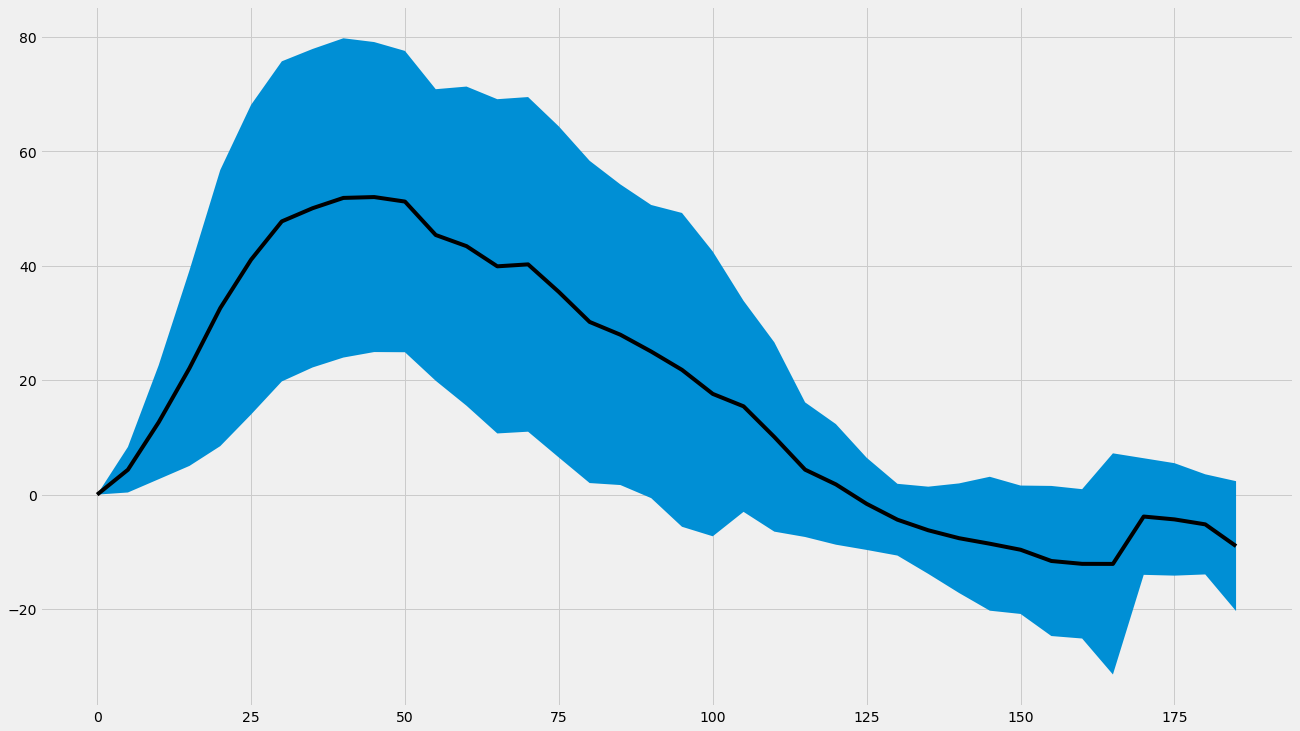

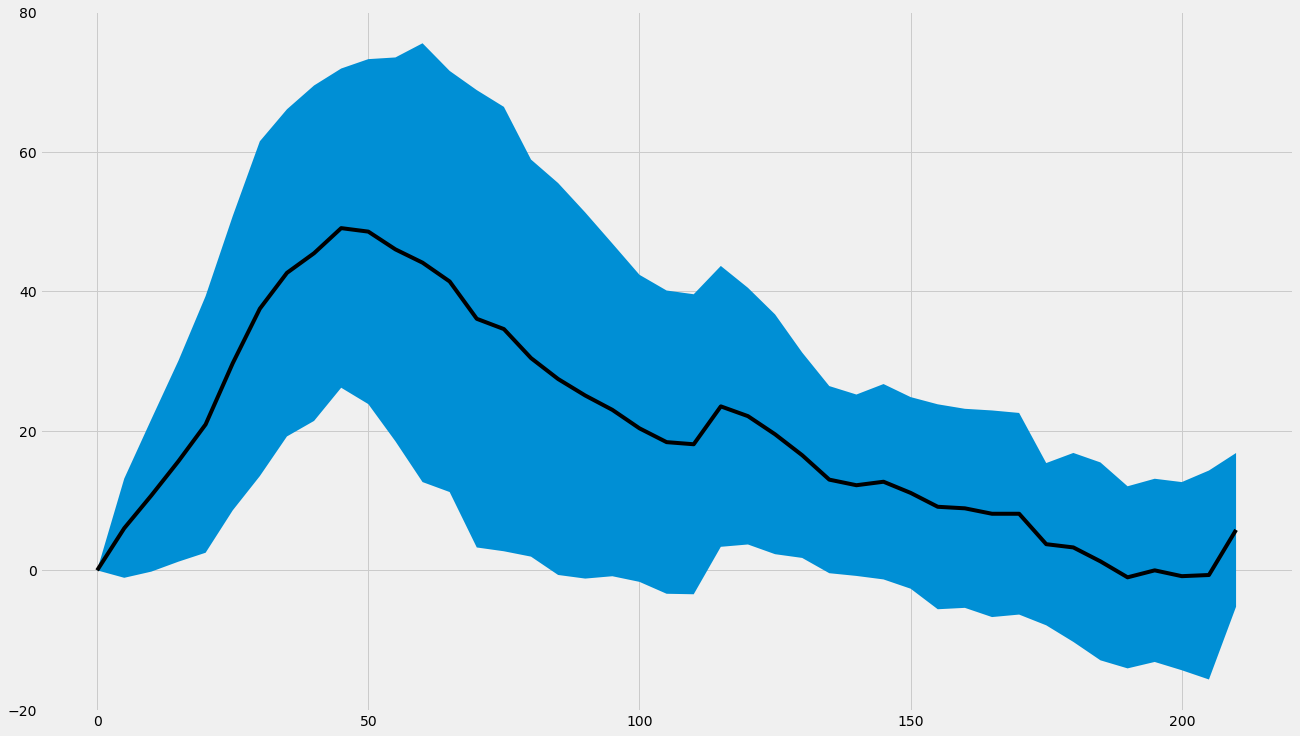

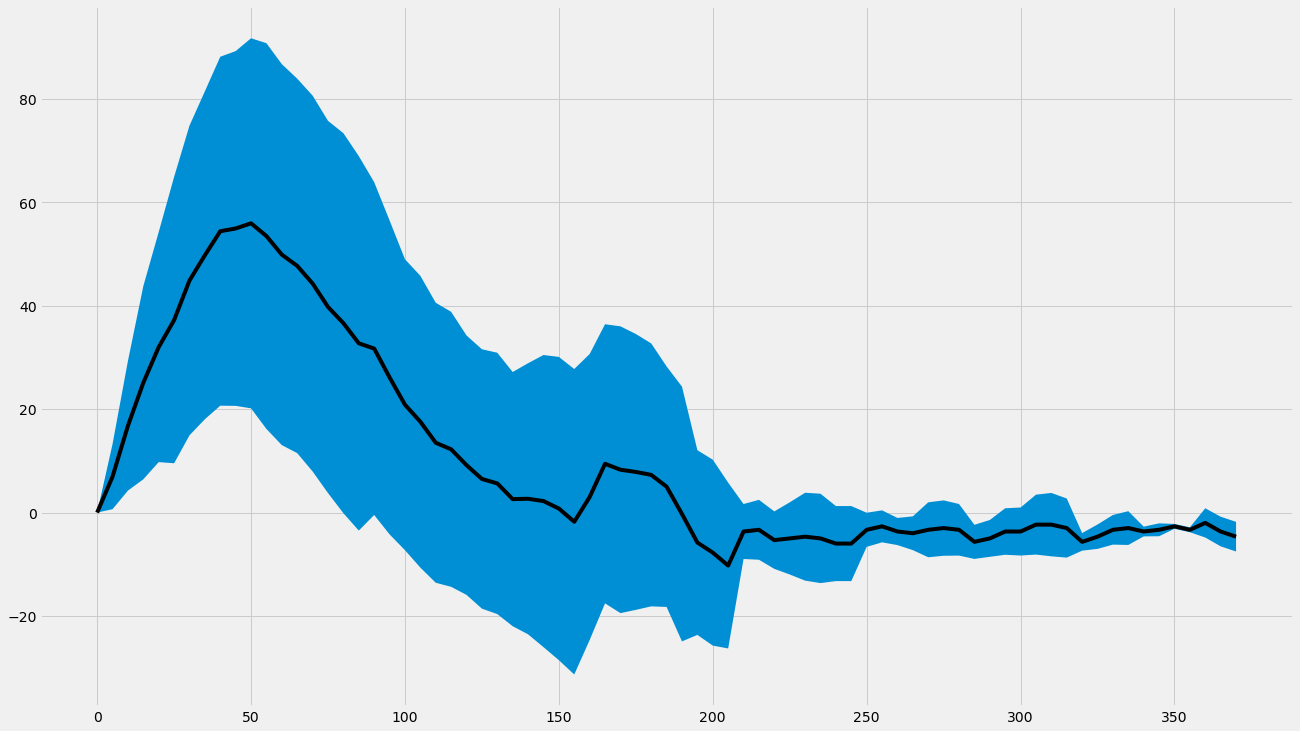

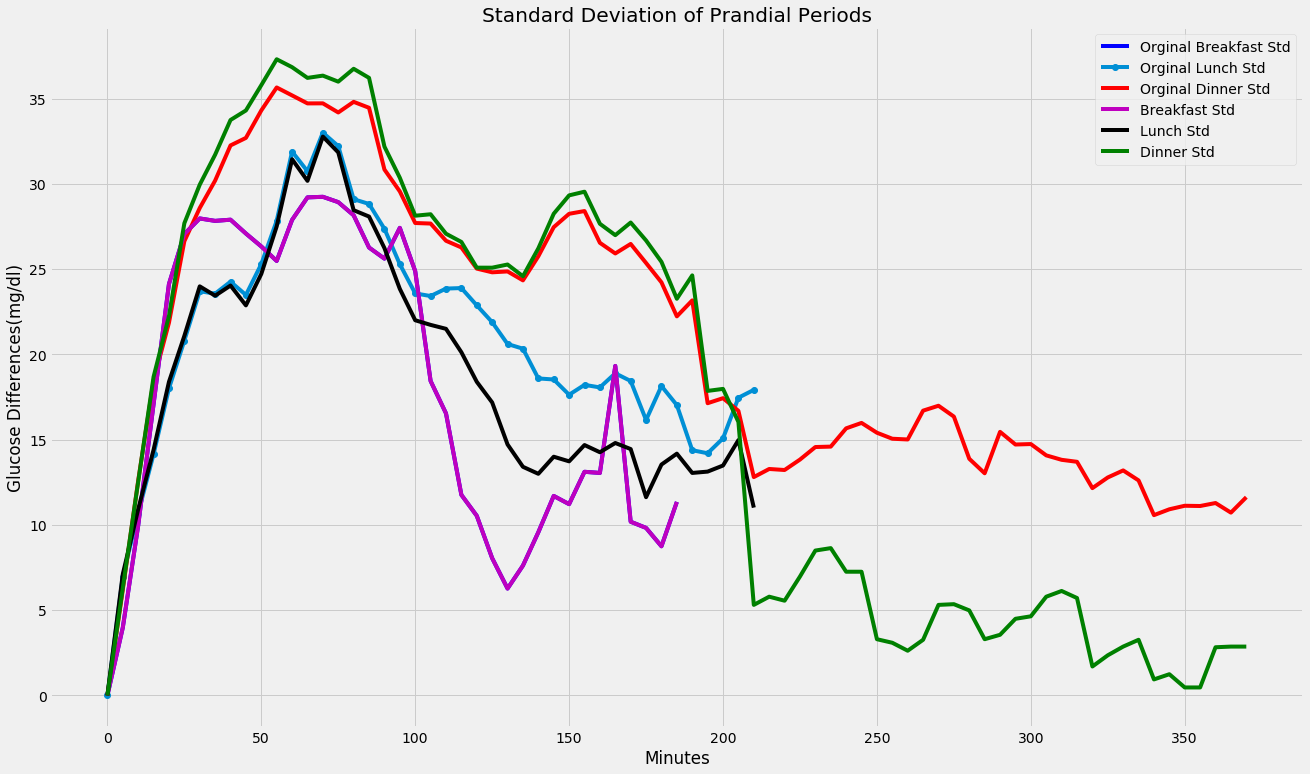

In [58]:
#Calculate the mean at each time increment after meal
 
postmeal_breakfast_mean = np.nanmean(breakfast_signals_df, axis=0)
postmeal_breakfast_std = np.nanstd(breakfast_signals_df, axis=0)
#print "Number of 5mins increments in the lunch df is:", lunch_signals_df.shape[1]
postmeal_lunch_mean = np.nanmean(lunch_signals_df, axis=0)
postmeal_lunch_std = np.nanstd(lunch_signals_df, axis=0)

#print "Number of 5mins increments in the dinner df is:", dinner_signals_df.shape[1]
postmeal_dinner_mean = np.nanmean(dinner_signals_df, axis=0)
postmeal_dinner_std = np.nanstd(dinner_signals_df, axis=0)

x_axis = [x*5 for x in range(breakfast_signals_df.shape[1])]
#print len(x_axis)

#plt.plot(peak_elapsed_t[j], postmeal_breakfast_std, 'y*', markersize=20)
#print postmeal_breakfast_std

plt.figure(figsize=(20,12))
# #hold on
plt.plot(x_axis, postmeal_breakfast_mean, 'k-')
#print "mean of breakfast signals is:", postmeal_breakfast_mean
#print "std of breakfast signals is:", postmeal_breakfast_std
plt.fill_between(x_axis, postmeal_breakfast_mean-postmeal_breakfast_std, postmeal_breakfast_mean+postmeal_breakfast_std)


x_axis = [x*5 for x in range(lunch_signals_df.shape[1])]
plt.figure(figsize=(20,12))
# #hold on
plt.plot(x_axis, postmeal_lunch_mean, 'k-')
plt.fill_between(x_axis, postmeal_lunch_mean-postmeal_lunch_std, postmeal_lunch_mean+postmeal_lunch_std)


x_axis = [x*5 for x in range(dinner_signals_df.shape[1])]
plt.figure(figsize=(20,12))
# #hold on
plt.plot(x_axis, postmeal_dinner_mean, 'k-')
plt.fill_between(x_axis, postmeal_dinner_mean-postmeal_dinner_std, postmeal_dinner_mean+postmeal_dinner_std)

#Plotting std for all periods
plt.figure(figsize=(20,12))

######################################
####Compare std after removing extreme outliers
org_breakfast_mean = np.nanmean(breakfast_org_df, axis=0)
org_breakfast_std = np.nanstd(breakfast_org_df, axis=0)

org_lunch_mean = np.nanmean(lunch_org_df, axis=0)
org_lunch_std = np.nanstd(lunch_org_df, axis=0)

org_dinner_mean = np.nanmean(dinner_org_df, axis=0)
org_dinner_std = np.nanstd(dinner_org_df, axis=0)

plt.plot(x_axis, org_breakfast_std, 'b-', label = 'Orginal Breakfast Std')
plt.plot(x_axis, org_lunch_std, 'o-', label = 'Orginal Lunch Std')
plt.plot(x_axis, org_dinner_std, 'r-',  label = 'Orginal Dinner Std')

plt.plot(x_axis, postmeal_breakfast_std, 'm-', label = 'Breakfast Std')
plt.plot(x_axis, postmeal_lunch_std, 'k-', label = 'Lunch Std')
plt.plot(x_axis, postmeal_dinner_std, 'g-',  label = 'Dinner Std')

###########

plt.xlabel('Minutes')
plt.ylabel('Glucose Differences(mg/dl)')
plt.legend(loc='updper right')
title = 'Standard Deviation of Prandial Periods'.format(after_reading)
plt.title(title);

We are expecting that BG does not increase past 90 minutes, so if there is an increase on the mean signal we will reduce it to a minimum by multipying by a small factor.

In [73]:
#after 90 minutes, if BG is decreasing => multiply difference between bg of that time instance and lowest point by 0.1

#when next point has bg less than previous lowest bg point, set the new point as the lowest bg point

def decrease_postpeak_variance(prandial_period):
    #Get mean of prandial period
    prandial_mean = np.mean(prandial_period)
    prandial_mean_instances = [round(item,1) for x, item in enumerate(prandial_mean)]
    #print prandial_mean_instances

    #Set all BG readings occuring after 90 minutes to be decreasing, 90 minutes is equivalent to index 90/5 = 18

    i = 90/5
    current_gl = prandial_mean_instances[i]

    while (i<(len(prandial_mean_instances)-1)):
            if (prandial_mean_instances[i+1]>current_gl):
                prandial_mean_instances[i+1] = round(((prandial_mean_instances[i+1]-current_gl) *0.1) + current_gl, 1)
            else:
                prandial_mean_instances[i+1] = round(prandial_mean_instances[i+1] *0.9 , 1)
                current_gl = prandial_mean_instances[i+1]
            i += 1    

    #print prandial_mean_instances


    x_axis = [x*5 for x in range(len(prandial_mean_instances))]
    plt.figure(figsize=(20,12))
    # #hold on
    plt.plot(x_axis, prandial_mean_instances, 'k-')

    global prandial_mean_wo_nan 
    prandial_mean_wo_nan = []
    y = [~np.isnan(prandial_mean_instances[:])]
    for k, x in enumerate(prandial_mean_instances):
        if (y[0][k] == True):
            prandial_mean_wo_nan.append(x)

    #print prandial_mean_wo_nan

    plt.show()


In [88]:
import statsmodels.api as sm

def curvefit(signal_pts, wonan):   
    
    #print signal_pts
    
    if (wonan==False):
        y = signal_pts[:][~np.isnan(signal_pts[:])]
    else:
        y = signal_pts
    
    #print y

    plot_indeces = map(lambda v : v * 6, range(len(y)))
    x = plot_indeces   

    p = np.poly1d(np.polyfit(x, y, deg=6))

    print "\nThe polynomial fitting the data is:\n\n",p  
    
    
####smoothing
    lowess = sm.nonparametric.lowess(y, x, frac=0.2)
    
    fig, ax = plt.subplots(figsize=(20,15))
    
    ax.plot(plot_indeces, y, label= 'Period Mean Data Points')  
    ax.plot(plot_indeces, p(plot_indeces), label = 'Fitted Curve')   
    ax.plot(lowess[:, 0], lowess[:, 1], label = 'Smoothed Curve')  
    legend = ax.legend(shadow=True) 
    plt.show()



Prandial mean for breakfast...



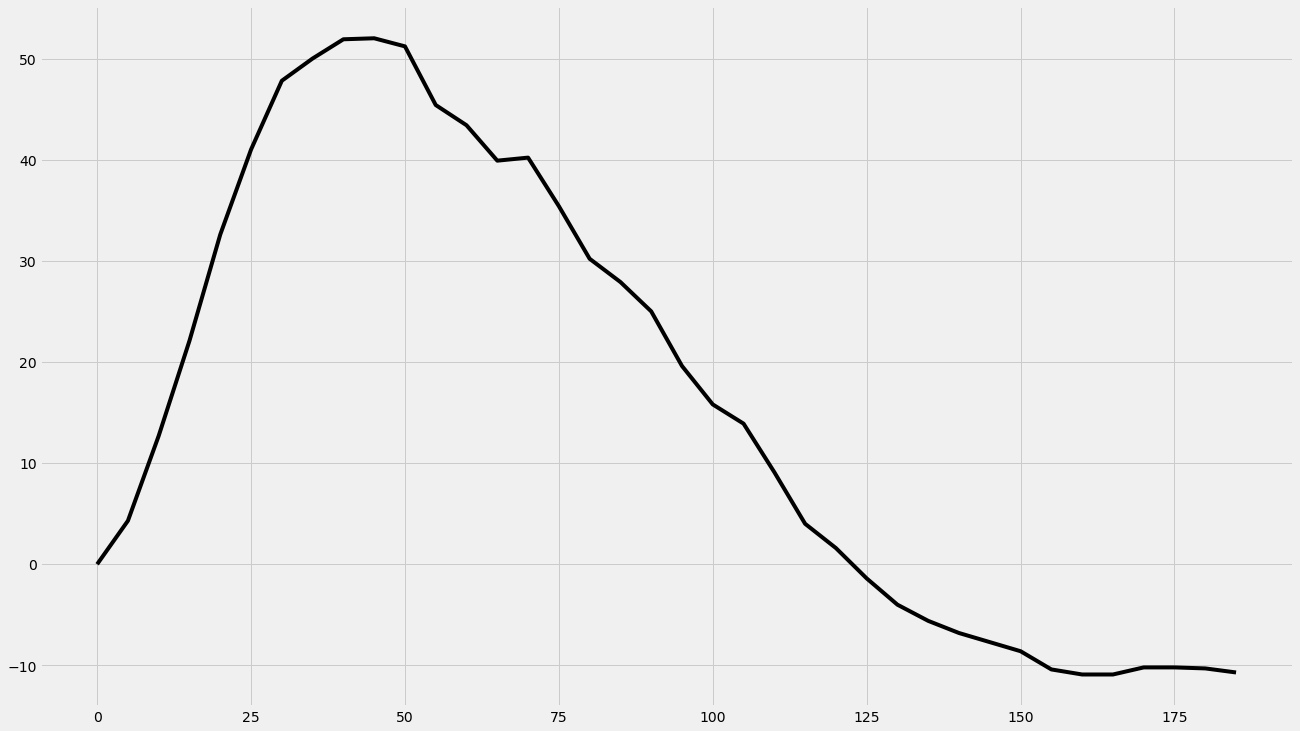

Adjusted signal, scaled down any post-peak increase...


The polynomial fitting the data is:

           6             5             4             3            2
2.281e-11 x - 1.614e-08 x + 4.095e-06 x - 0.0003873 x - 0.002804 x + 1.771 x - 3.886


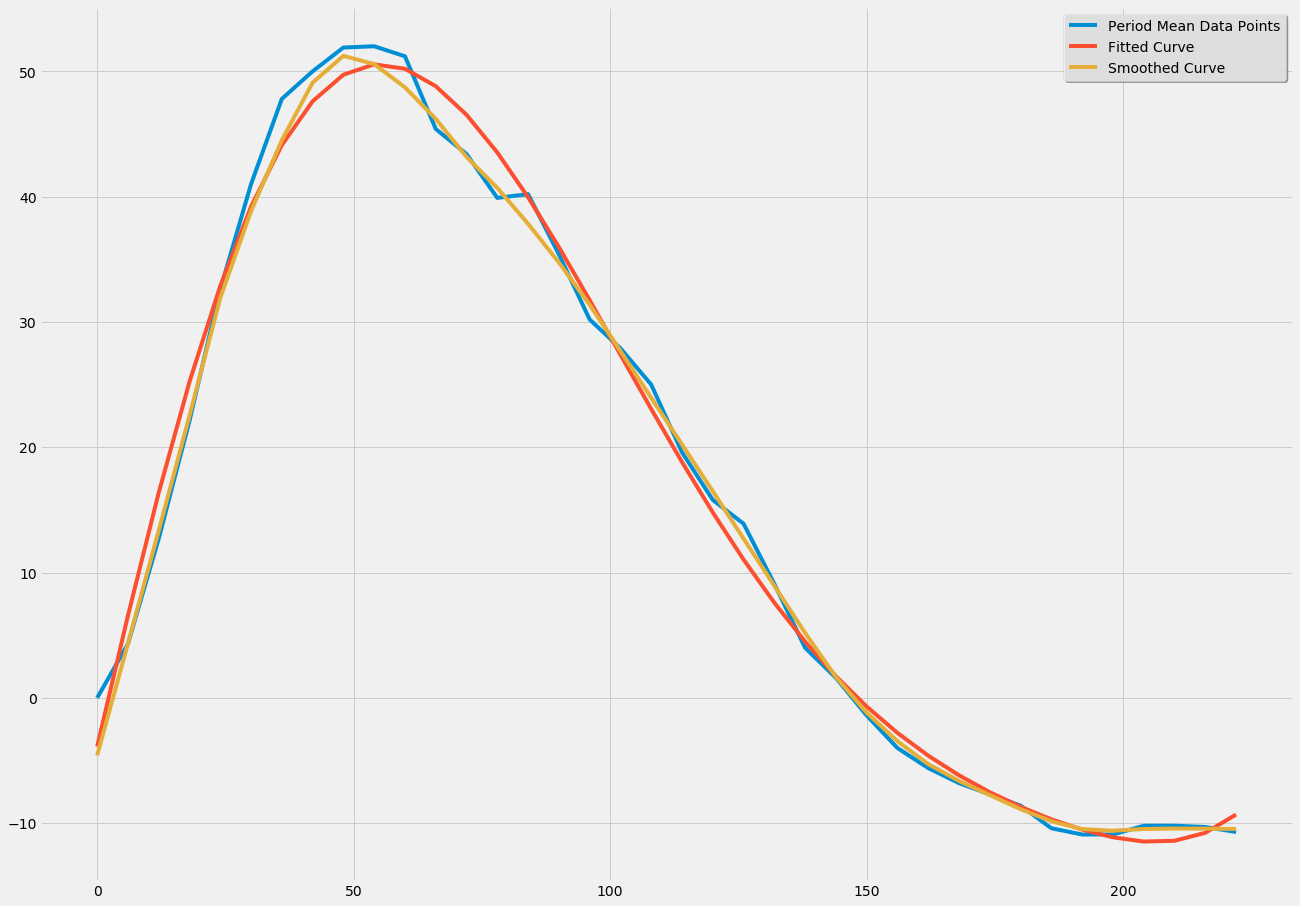

In [89]:
print "Prandial mean for breakfast...\n"
decrease_postpeak_variance(breakfast_signals_df)    

# print "Original signal...\n"
# wonan = False    
# curvefit(postmeal_breakfast_mean,wonan)  

print "Adjusted signal, scaled down any post-peak increase...\n"
wonan = True  
curvefit(prandial_mean_wo_nan,wonan)

Prandial mean for lunch...



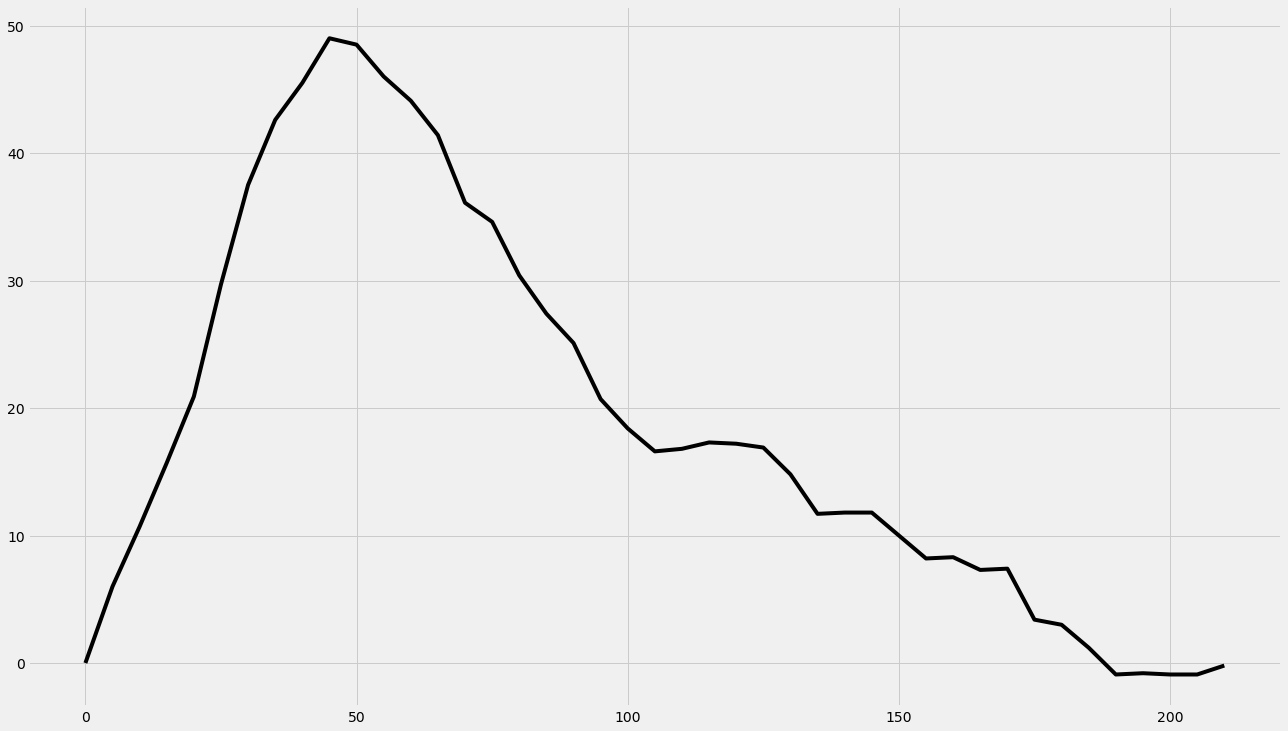

Adjusted signal, scaled down any post-peak increase...


The polynomial fitting the data is:

           6             5             4             3          2
3.285e-11 x - 2.453e-08 x + 6.673e-06 x - 0.0007646 x + 0.0257 x + 0.8454 x - 1.349


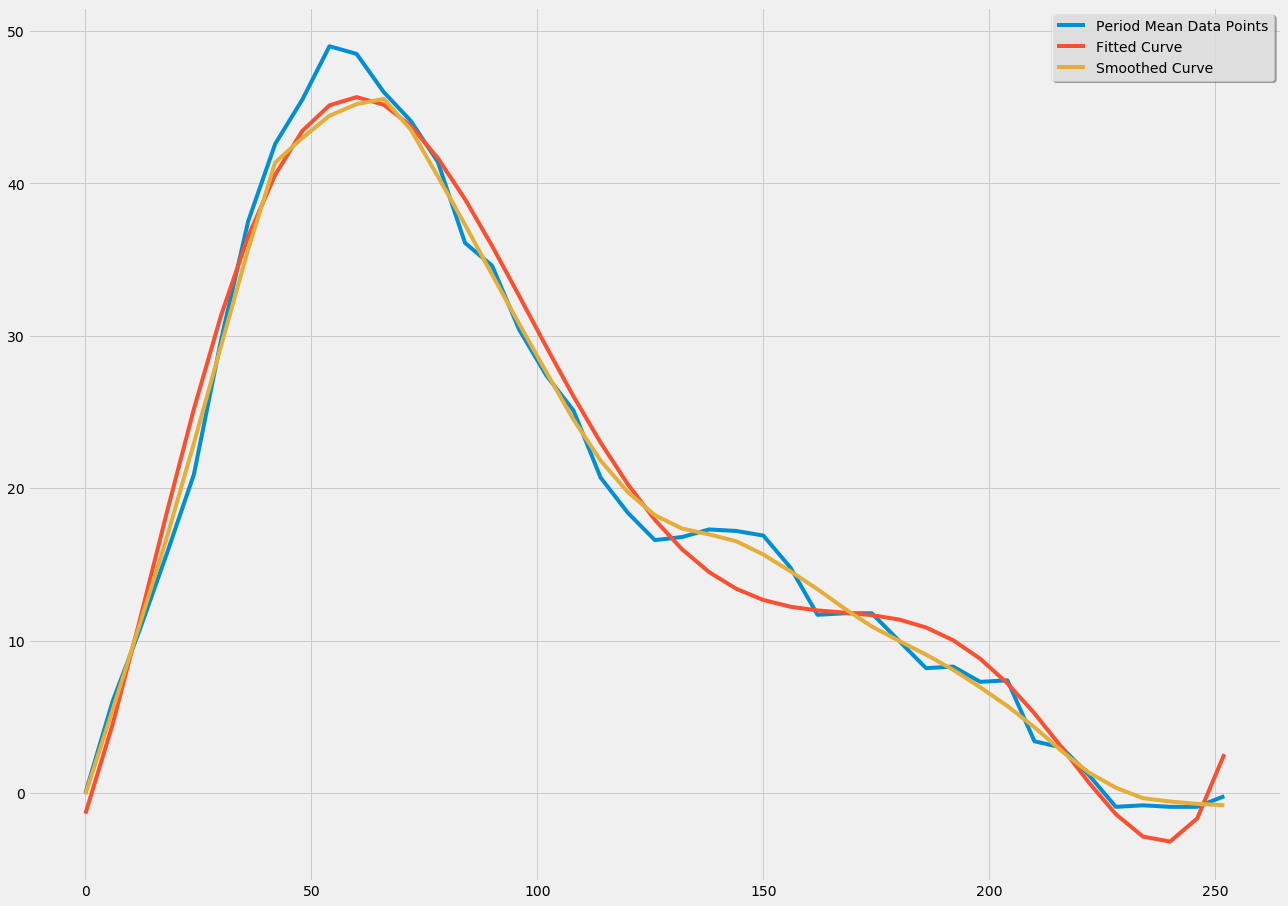

In [90]:
print "Prandial mean for lunch...\n"
decrease_postpeak_variance(lunch_signals_df)    

# print "Original signal...\n"
# wonan = False    
# curvefit(postmeal_lunch_mean,wonan)  

print "Adjusted signal, scaled down any post-peak increase...\n"
wonan = True  
curvefit(prandial_mean_wo_nan,wonan)

Prandial mean for dinner...



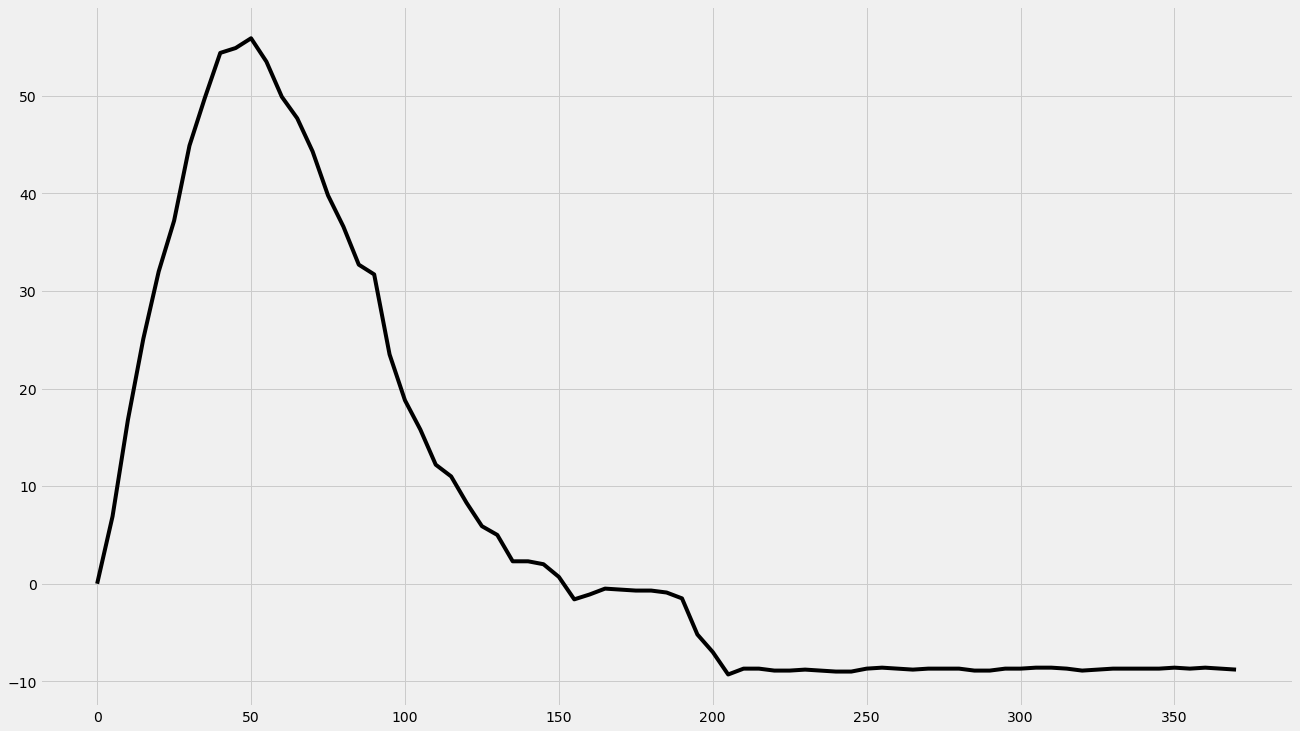

Adjusted signal, scaled down any post-peak increase...


The polynomial fitting the data is:

            6             5             4            3           2
-8.998e-13 x + 1.451e-09 x - 9.237e-07 x + 0.000291 x - 0.04555 x + 2.851 x - 8.33


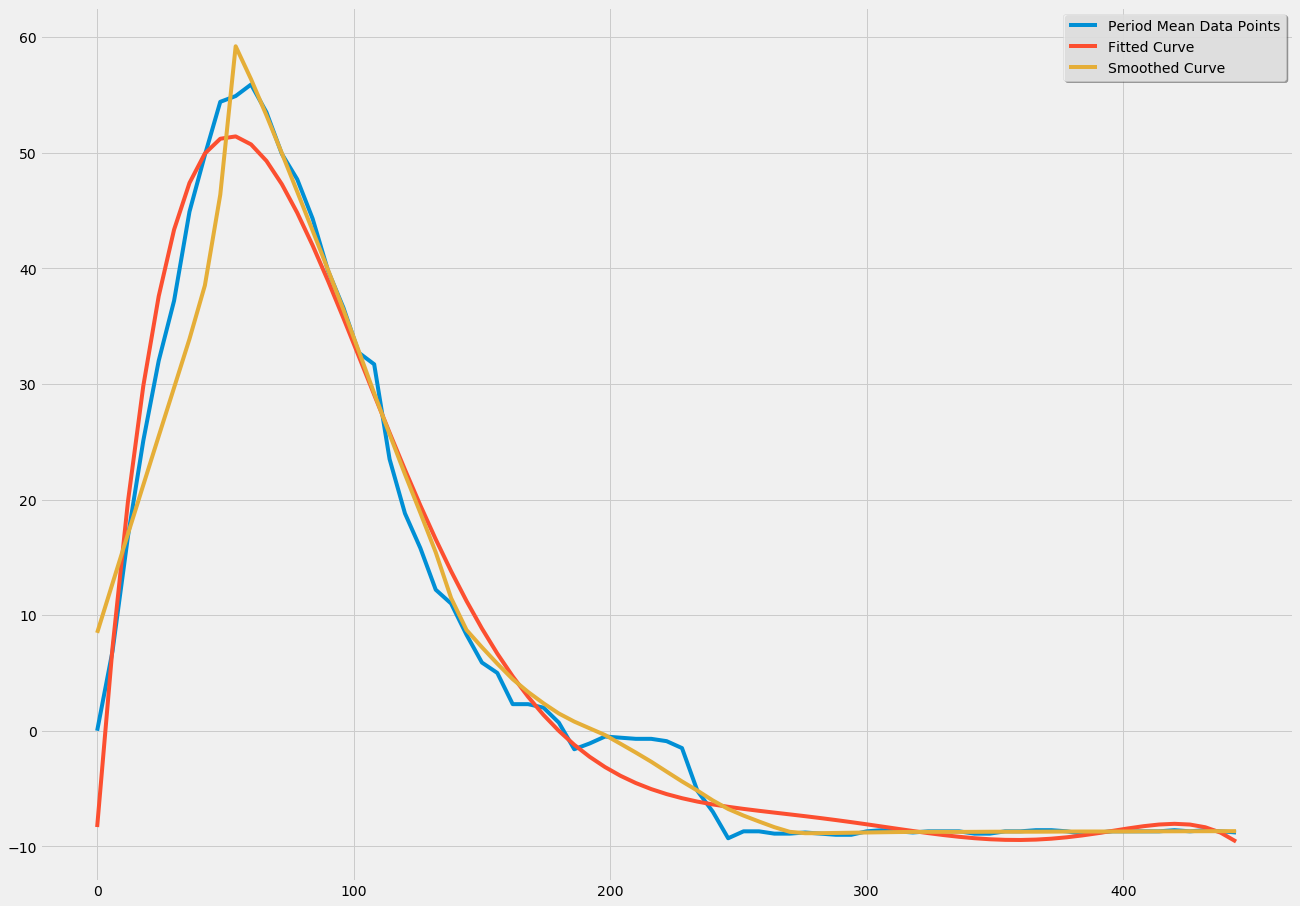

In [91]:
print "Prandial mean for dinner...\n"
decrease_postpeak_variance(dinner_signals_df)    

# print "Original signal...\n"
# wonan = False    
# curvefit(postmeal_dinner_mean,wonan)  

print "Adjusted signal, scaled down any post-peak increase...\n"

wonan = True  
curvefit(prandial_mean_wo_nan,wonan)

##Contriubtion 2: Mapping Food to BG concentrations

**Let's first try to curve fit the signals. If well fitted, we will try to map food intake to polynomial coeffecients.**

Leave one signal out, find error after training on the rest of the signals.
Get average error for all signals.